In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib.colors as mcolors
import networkx as nx
import pickle

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.control.optimal_control import oc_wc, cost_functions

import matplotlib as mpl
label_size= 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.linewidth'] = 1

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

while "Promotion/neurolib" in os.getcwd():
    os.chdir('..')

pickledir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/optimal_control/WP2/2n")
dir = os.path.join(pickledir, "images_2n_wc_static")

print(dir)

def get_period(timeseries, dt):
    peaks = scipy.signal.find_peaks(timeseries, prominence=0.001)[0]
    periods = []
    for i in range(2, len(peaks)-1):
        periods.append( (peaks[i] - peaks[i-1]) * dt)
    return np.mean(periods)

/home/lena/Promotion/neurolib_aln_osc_datastorage/optimal_control/WP2/2n/images_2n_wc_static


In [2]:
p_names = ["D-exp", "D-osc", "U-exp", "U-osc", "Bi-exp", "Bi-osc"]
coords = [[1., 1.5], [1.5, 1.], [3., 1.], [2.2, 0.4], [2.2, 2.1], [2.4, 1.6]]

coupling = 1.8
cmat = np.array( [[0., 1.], [1., 0.]] )
N = cmat.shape[0]

duration = 2000.
dt = 0.1


for i in range(len(p_names)):
    p = p_names[i]
    data[p]["coordinates"] = coords[i]

NameError: name 'data' is not defined

D-exp


D-osc


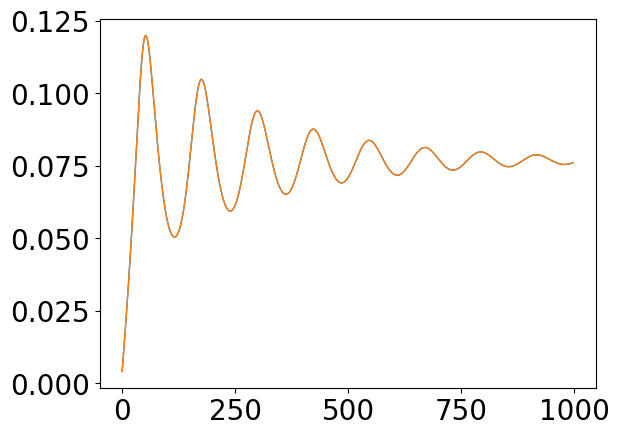

12.328571428571427 12.328571428571427
U-exp
U-osc


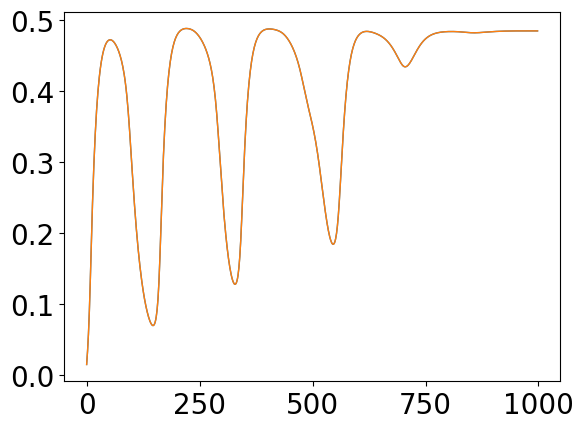

18.85 18.85
Bi-exp


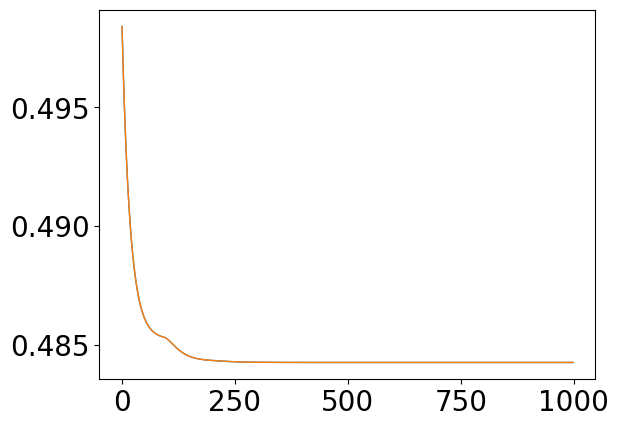

Bi-osc


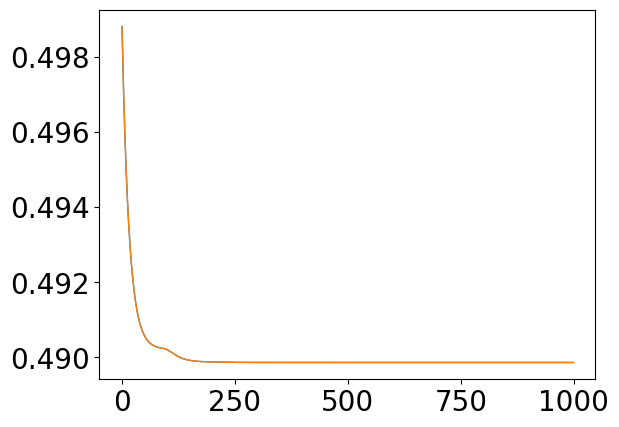

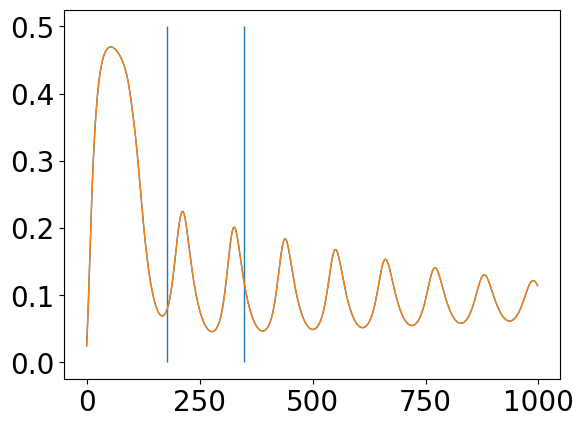

10.750000000000002


In [9]:
if True:
    data = dict()

    for i in range(len(p_names)):
        p = p_names[i]
        data[p] = dict()
        data[p]["coordinates"] = coords[i]
        data[p]["target_period"] = 20.
        data[p]["delay"] = 9.5

        if "Bi" in p:
            data[p]["control"] = [[None, None], [None, None]]
            data[p]["state"] = [[None, None], [None, None]]
            data[p]["init_state"] = [None, None]
            data[p]["weight"] = [[1., 1.], [1., 1.]]
            data[p]["dur/per"] = [[1000., 20], [1000., 20]]
        else:
            data[p]["control"] = [None, None]
            data[p]["state"] = [None, None]
            data[p]["init_state"] = None
            data[p]["weight"] = [1., 1.]
            data[p]["dur/per"] = [1000., 20]


duration = 2000.
dt = 0.1

data["U-osc"]["delay"] = 13.75
data["Bi-osc"]["delay"] = 9.5

test_input_plus = ZeroInput().generate_input(duration=duration+dt, dt=dt)
test_input_plus[:,:500] = 5.

test_input_minus = ZeroInput().generate_input(duration=duration+dt, dt=dt)
test_input_minus[:,:500] = -5.

for pi in range(len(p_names)):

    if "Bi" in p_names[pi]:
        continue

    print(p_names[pi])

    model = WCModel(Cmat=cmat, Dmat=data[p_names[pi]]["delay"]*20.*cmat)

    model.params['duration'] = duration
    model.params.exc_ext_baseline = data[p_names[pi]]["coordinates"][0]
    model.params.inh_ext_baseline = data[p_names[pi]]["coordinates"][1]
    model.params["exc_ext"] = test_input_minus

    model.params.K_gl = coupling
    model.run()
    nmaxdelay = model.getMaxDelay()

    einit = np.zeros((N, nmaxdelay+1))
    iinit = np.zeros((N, nmaxdelay+1))

    for n in range(N):
        einit[n,:] = model.exc[n,-nmaxdelay-1:]
        iinit[n,:] = model.inh[n,-nmaxdelay-1:]

    data[p_names[pi]]["init_state"] = [einit, iinit]

    if "osc" in p_names[pi]:
        plt.plot(model.exc[0,501:1500])
        plt.plot(model.exc[1,501:1500])
        plt.show()

        per0 = get_period(-model.exc[0,601:], dt)
        per1 = get_period(-model.exc[1,601:], dt)
        data[p]["target_period"] = np.mean([per0, per1])

        print(per0, per1)        

for pi in range(len(p_names)):

    if "Bi" not in p_names[pi]:
        continue

    print(p_names[pi])

    model = WCModel(Cmat=cmat, Dmat=data[p_names[pi]]["delay"]*20.*cmat)

    model.params['duration'] = duration
    model.params.exc_ext_baseline = data[p_names[pi]]["coordinates"][0]
    model.params.inh_ext_baseline = data[p_names[pi]]["coordinates"][1]
    model.params.K_gl = coupling
    nmaxdelay = model.getMaxDelay()

    model.params["exc_ext"] = test_input_plus
    model.params["inh_ext"] = test_input_plus
    model.run()

    plt.plot(model.exc[0,501:1500])
    plt.plot(model.exc[1,501:1500])
    plt.show()

    einit = np.zeros((N, nmaxdelay+1))
    iinit = np.zeros((N, nmaxdelay+1))

    for n in range(N):
        einit[n,:] = model.exc[n,-nmaxdelay-1:]
        iinit[n,:] = model.inh[n,-nmaxdelay-1:]

    data[p_names[pi]]["init_state"][0] = [einit, iinit]

    model.params["exc_ext"] = test_input_minus
    model.params["inh_ext"] = test_input_minus
    model.run()

    einit = np.zeros((N, nmaxdelay+1))
    iinit = np.zeros((N, nmaxdelay+1))

    for n in range(N):
        einit[n,:] = model.exc[n,-nmaxdelay-1:]
        iinit[n,:] = model.inh[n,-nmaxdelay-1:]

    data[p_names[pi]]["init_state"][1] = [einit, iinit]

    if "osc" in p_names[pi]:
        plt.plot(model.exc[0,501:1500])
        plt.plot(model.exc[1,501:1500])
        plt.vlines([177, 348], 0, 0.5)
        plt.show()

        per0 = get_period(-model.exc[0,601:], dt)
        per1 = get_period(-model.exc[1,601:], dt)
        data[p]["target_period"] = np.mean([per0, per1])

        print(data[p]["target_period"])

In [4]:
controlmat = np.ones((N,2))

controlmat_e = np.zeros((N,2))
controlmat_e[:,0] = 1.

controlmat_i = np.zeros((N,2))
controlmat_i[:,1] = 1.

controlmat_0e = np.zeros((N,2))
controlmat_0e[0,0] = 1.

controlmat_0i = np.zeros((N,2))
controlmat_0i[0,1] = 1.

controlmat_1e = np.zeros((N,2))
controlmat_1e[1,0] = 1.

controlmat_1i = np.zeros((N,2))
controlmat_1i[1,1] = 1.

costmat = np.zeros((N, 2))
costmat[:,0] = 1.

it = 50
maxstr = 5

pr = np.arange(0,1001,20)
testd = 1000.

zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
zero_control = np.vstack( ([zero_input]*N))

In [5]:
def optimize_model(model, exprange):
    for l in range(2):
        for k in exprange:
            model.zero_step_encountered = False
            model.step = 10**(k)
            model.optimize(it)
        model.control_matrix = controlmat
    model.zero_step_encountered = False

    return

In [15]:
data["D-exp"]["weight"] = [1. * 1e-6, 1. * 1e-5]
data["D-osc"]["weight"] = [5. * 1e-5, 5. * 1e-4]
data["U-exp"]["weight"] = [2. * 1e-5, 2. * 1e-4]
data["U-osc"]["weight"] = [5. * 1e-5, 5. * 1e-4]
data["Bi-exp"]["weight"] = [[2. * 1e-4, 6. * 1e-4], [2. * 1e-4, 6. * 1e-4]]
data["Bi-osc"]["weight"] = [[2. * 1e-4, 6. * 1e-4], [2. * 1e-4, 6. * 1e-4]]

data["D-exp"]["dur/per"] = [400., 15]
data["D-osc"]["dur/per"] = [1400., 57.]
data["U-exp"]["dur/per"] = [1000., 44.]
data["U-osc"]["dur/per"] = [1400., 60.]
data["Bi-exp"]["dur/per"] = [[500., 16], [500., 16]]
data["Bi-osc"]["dur/per"] = [[500., 16], [500., 16]]

Point  D-exp
target period, max delay =  20.0 95
duration =  400.0
w2 =  1e-06
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: 5.999999968668901e-10
Cost in iteration 20: -2.471788279404818e-06
Cost in iteration 40: -0.47366438661606713
Converged in iteration 46 with cost -0.474257595134651
Final cost : -0.474257595134651
Compute control for a deterministic system
Cost in iteration 0: -0.474257595134651
Cost in iteration 20: -0.47425766764611643
Converged in iteration 31 with cost -0.474277942603546
Final cost : -0.474277942603546
Compute control for a deterministic system
Cost in iteration 0: -0.474277942603546
Cost in iteration 20: -0.47427826521250893
Converged in iteration 21 with cost -0.47427826521250893
Final cost : -0.47427826521250893
Compute control for a deterministic system
Cost in iteration 0: -0.47427826521250893
Converged in iteration 5 with cost -0.47427826521250893
Final cost : -0.47427826521250893
Compute 

ValueError: x and y must have same first dimension, but have shapes (800,) and (0,)

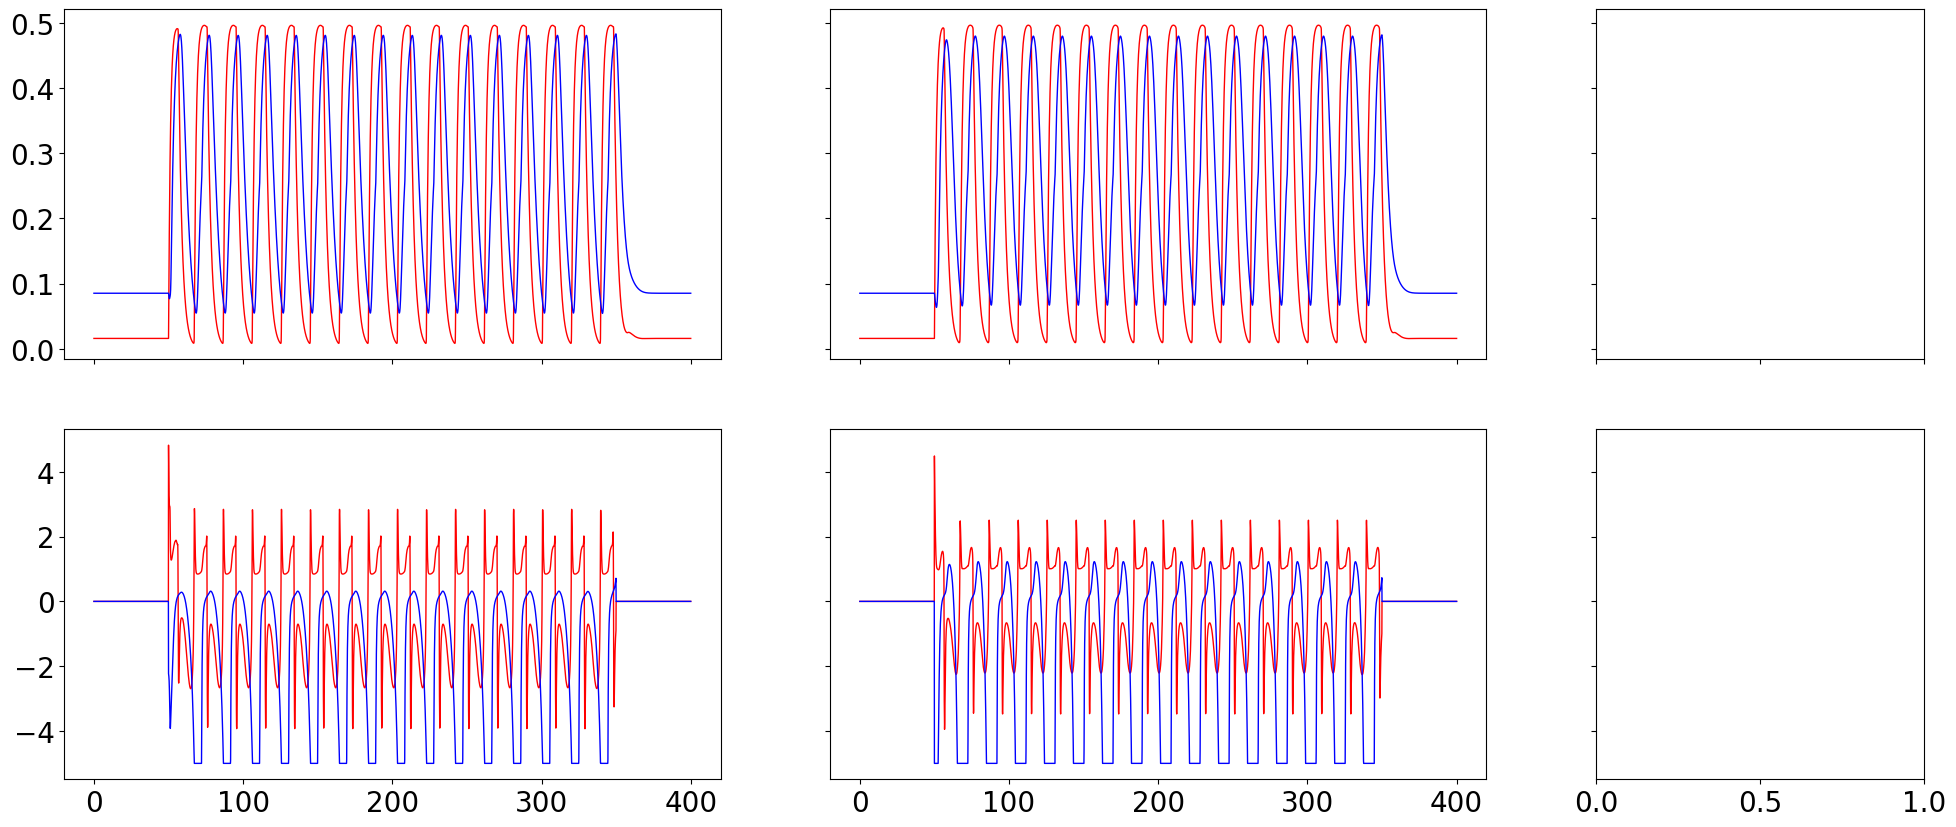

In [16]:
for pi in range(len(p_names)):
    p = p_names[pi]

    if "Bi" in p:
        continue

    if pi not in [0]: continue

    print("Point ", p)
      
    target_period = data[p]["target_period"]

    model = WCModel(Cmat=cmat, Dmat=data[p_names[pi]]["delay"]*20.*cmat)
    nmaxdelay = model.getMaxDelay()
    print("target period, max delay = ", target_period, nmaxdelay)

    model.params["exc_ext_baseline"] =  data[p]["coordinates"][0]
    model.params["inh_ext_baseline"] =  data[p]["coordinates"][1]
    model.params.K_gl = coupling
        
    model.params.duration = data[p]["dur/per"][0]
    print("duration = ", model.params.duration)

    zero_input0 = ZeroInput().generate_input(duration=model.params.duration+model.params.dt, dt=model.params.dt)
    zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
    zero_control = np.vstack( ([zero_input]*N))
    zero_control = np.vstack( ([zero_input]*N))
    model.params["exc_ext"] = zero_control[:,0,:]
    model.params["inh_ext"] = zero_control[:,1,:]

    model.params["exc_init"] = data[p]["init_state"][0]
    model.params["inh_init"] = data[p]["init_state"][1]

    model.run()
    
    int0 = 500
    int1 = int0 + int(data[p]["dur/per"][1]*target_period/dt)

    for wi, w2 in enumerate(data[p]["weight"]):

        print("w2 = ",w2)

        model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), control_interval=(int0, int1),
                                      cost_matrix=costmat, control_matrix=controlmat)
        model_controlled.channelwise_optimization = True
        model_controlled.weights["w_p"] = 0.
        model_controlled.weights["w_2"] = w2
        model_controlled.weights["w_f_sync"] = 1.

        model_controlled.maximum_control_strength = maxstr

        if True:
            if type(data[p]["control"][wi]) != type(None):
                model_controlled.control = data[p]["control"][wi].copy()
                model_controlled.update_input()

        if False:
            initrange = np.arange(-6., 9., 2.)
            cost_0e, cost_0i, cost_1e, cost_1i, cost_e, cost_i, cost_ei = 1e6, 1e6, 1e6, 1e6, 1e6, 1e6, 1e6
            
            ######## init 0E
            model_controlled.control_matrix = controlmat_0e
            model_controlled.control = zero_control.copy() + 1e-3
            model_controlled.update_input()
            optimize_model(model_controlled, initrange)

            cost_0e = model_controlled.cost_history[-1]
            control_0e = model_controlled.control.copy()

            ######## init 0I
            model_controlled.control_matrix = controlmat_0i
            model_controlled.control = zero_control.copy() + 1e-3
            model_controlled.update_input()
            optimize_model(model_controlled, initrange)

            cost_0i = model_controlled.cost_history[-1]
            control_0i = model_controlled.control.copy()

            ######## init 1E
            model_controlled.control_matrix = controlmat_1e
            model_controlled.control = zero_control.copy() + 1e-3
            model_controlled.update_input()
            optimize_model(model_controlled, initrange)

            cost_1e = model_controlled.cost_history[-1]
            control_1e = model_controlled.control.copy()

            ######## init 1I
            model_controlled.control_matrix = controlmat_1i
            model_controlled.control = zero_control.copy() + 1e-3
            model_controlled.update_input()
            optimize_model(model_controlled, initrange)

            cost_1i = model_controlled.cost_history[-1]
            control_1i = model_controlled.control.copy()

            ######## init E
            model_controlled.control_matrix = controlmat_e
            model_controlled.control = zero_control.copy() + 1e-3
            model_controlled.update_input()
            optimize_model(model_controlled, initrange)

            cost_e = model_controlled.cost_history[-1]
            control_e = model_controlled.control.copy()

            ######## init I
            model_controlled.control_matrix = controlmat_i
            model_controlled.control = zero_control.copy() + 1e-3
            model_controlled.update_input()
            optimize_model(model_controlled, initrange)

            cost_i = model_controlled.cost_history[-1]
            control_i = model_controlled.control.copy()

            ######## init E/I
            model_controlled.control_matrix = controlmat
            model_controlled.control = zero_control.copy() + 1e-3
            model_controlled.update_input()
            optimize_model(model_controlled, initrange)

            cost_ei = model_controlled.cost_history[-1]
            control_ei = model_controlled.control.copy()

            ###### compare
            all_cost = [cost_0e, cost_0i, cost_1e, cost_1i, cost_e, cost_i, cost_ei]
            print(all_cost)
            if min(all_cost) == cost_0e:
                model_controlled.control = control_0e.copy()
                print("CHOSE 0E INIT --------------------------------------------------------")
            elif min(all_cost) == cost_0i:
                model_controlled.control = control_0i.copy()
                print("CHOSE 0I INIT --------------------------------------------------------")
            elif min(all_cost) == cost_1e:
                model_controlled.control = control_1e.copy()
                print("CHOSE 1E INIT --------------------------------------------------------")
            elif min(all_cost) == cost_1i:
                model_controlled.control = control_1i.copy()
                print("CHOSE 1I INIT --------------------------------------------------------")
            elif min(all_cost) == cost_e:
                model_controlled.control = control_e.copy()
                print("CHOSE E INIT --------------------------------------------------------")
            elif min(all_cost) == cost_i:
                model_controlled.control = control_i.copy()
                print("CHOSE I INIT --------------------------------------------------------")
            elif min(all_cost) == cost_ei:
                model_controlled.control = control_ei.copy()
                print("CHOSE EI INIT --------------------------------------------------------")

            model_controlled.update_input()

        model_controlled.control = zero_control.copy() + 1e-3

        for l in range(1):
            for k in np.arange(-6., 6., 2.):
                model_controlled.zero_step_encountered = False
                model_controlled.step = 10**(k)
                model_controlled.optimize(it)

        data[p]["control"][wi] = model_controlled.control.copy()
        data[p]["state"][wi] = model_controlled.get_xs()

    plot_control(data[p], data[p]["dur/per"][0], dt, 0)
    plot_control(data[p], data[p]["dur/per"][0], dt, 1)

with open(os.path.join(pickledir, '2n_wc_static.pickle'), 'wb') as f:
    pickle.dump(data, f)

Point  D-exp
1e-06


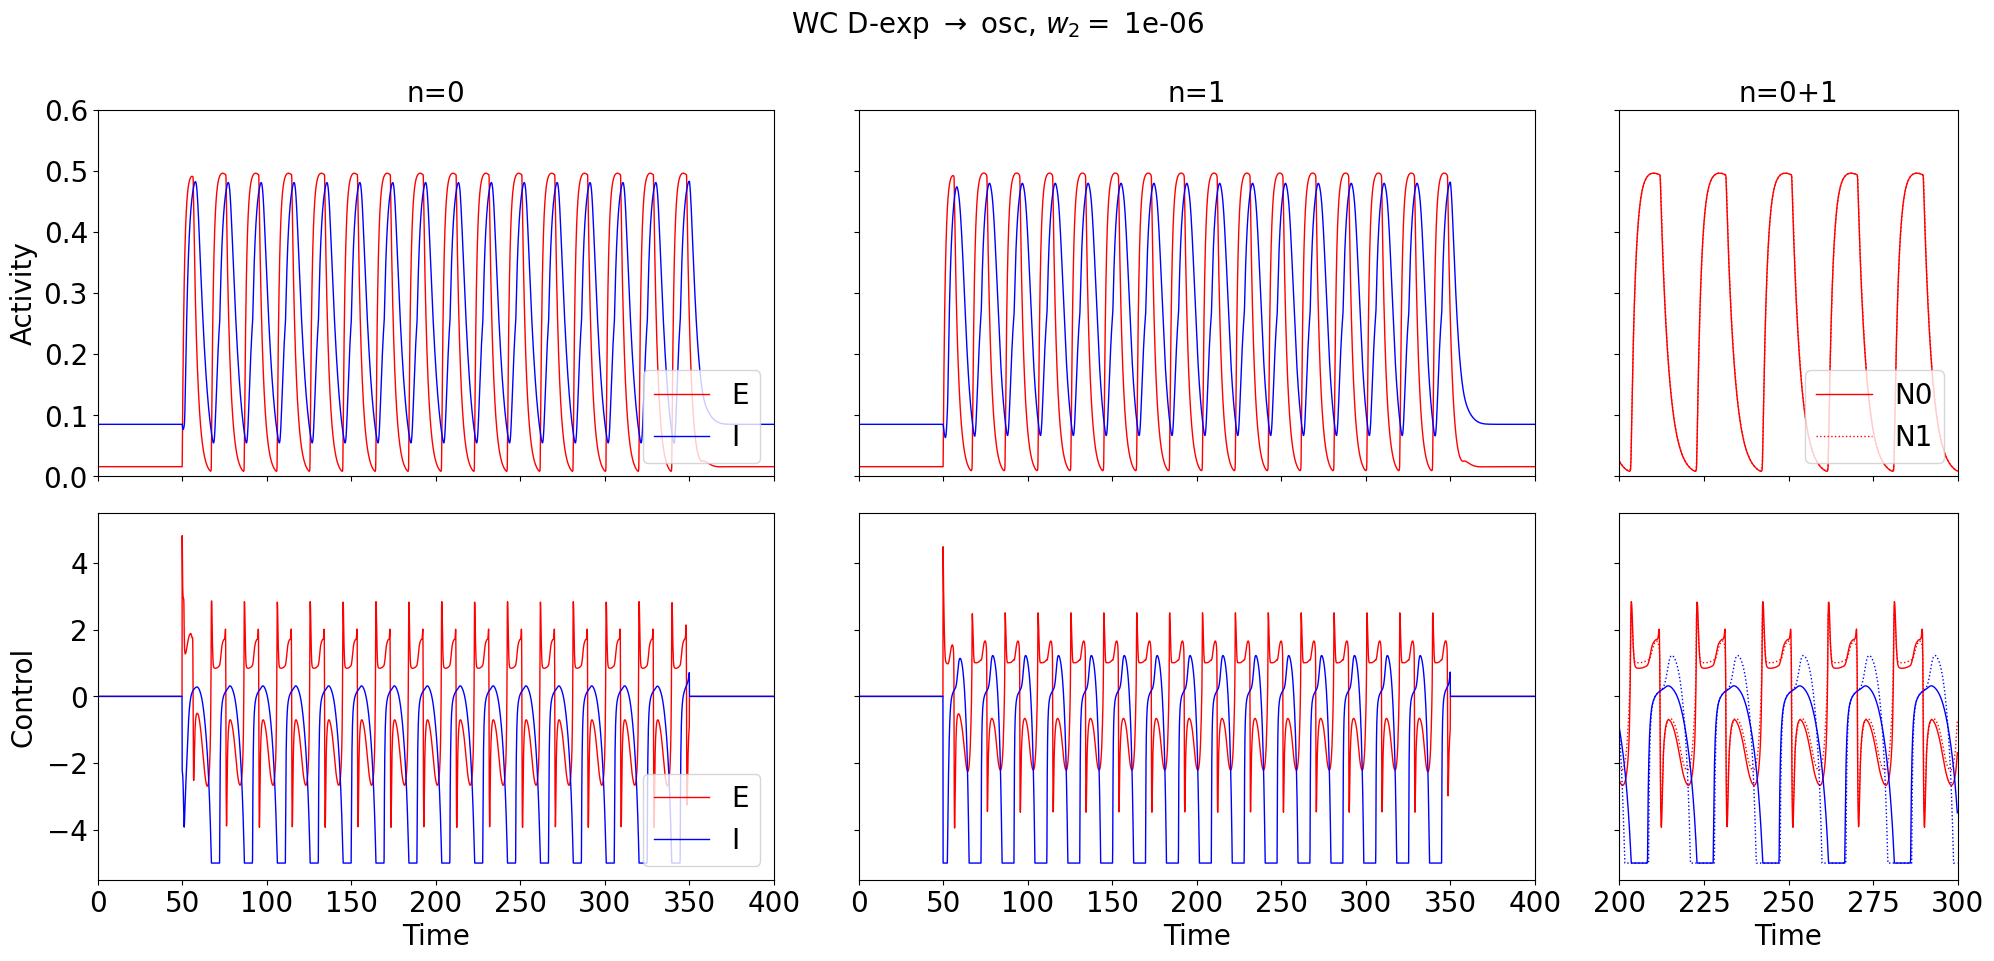

1e-05


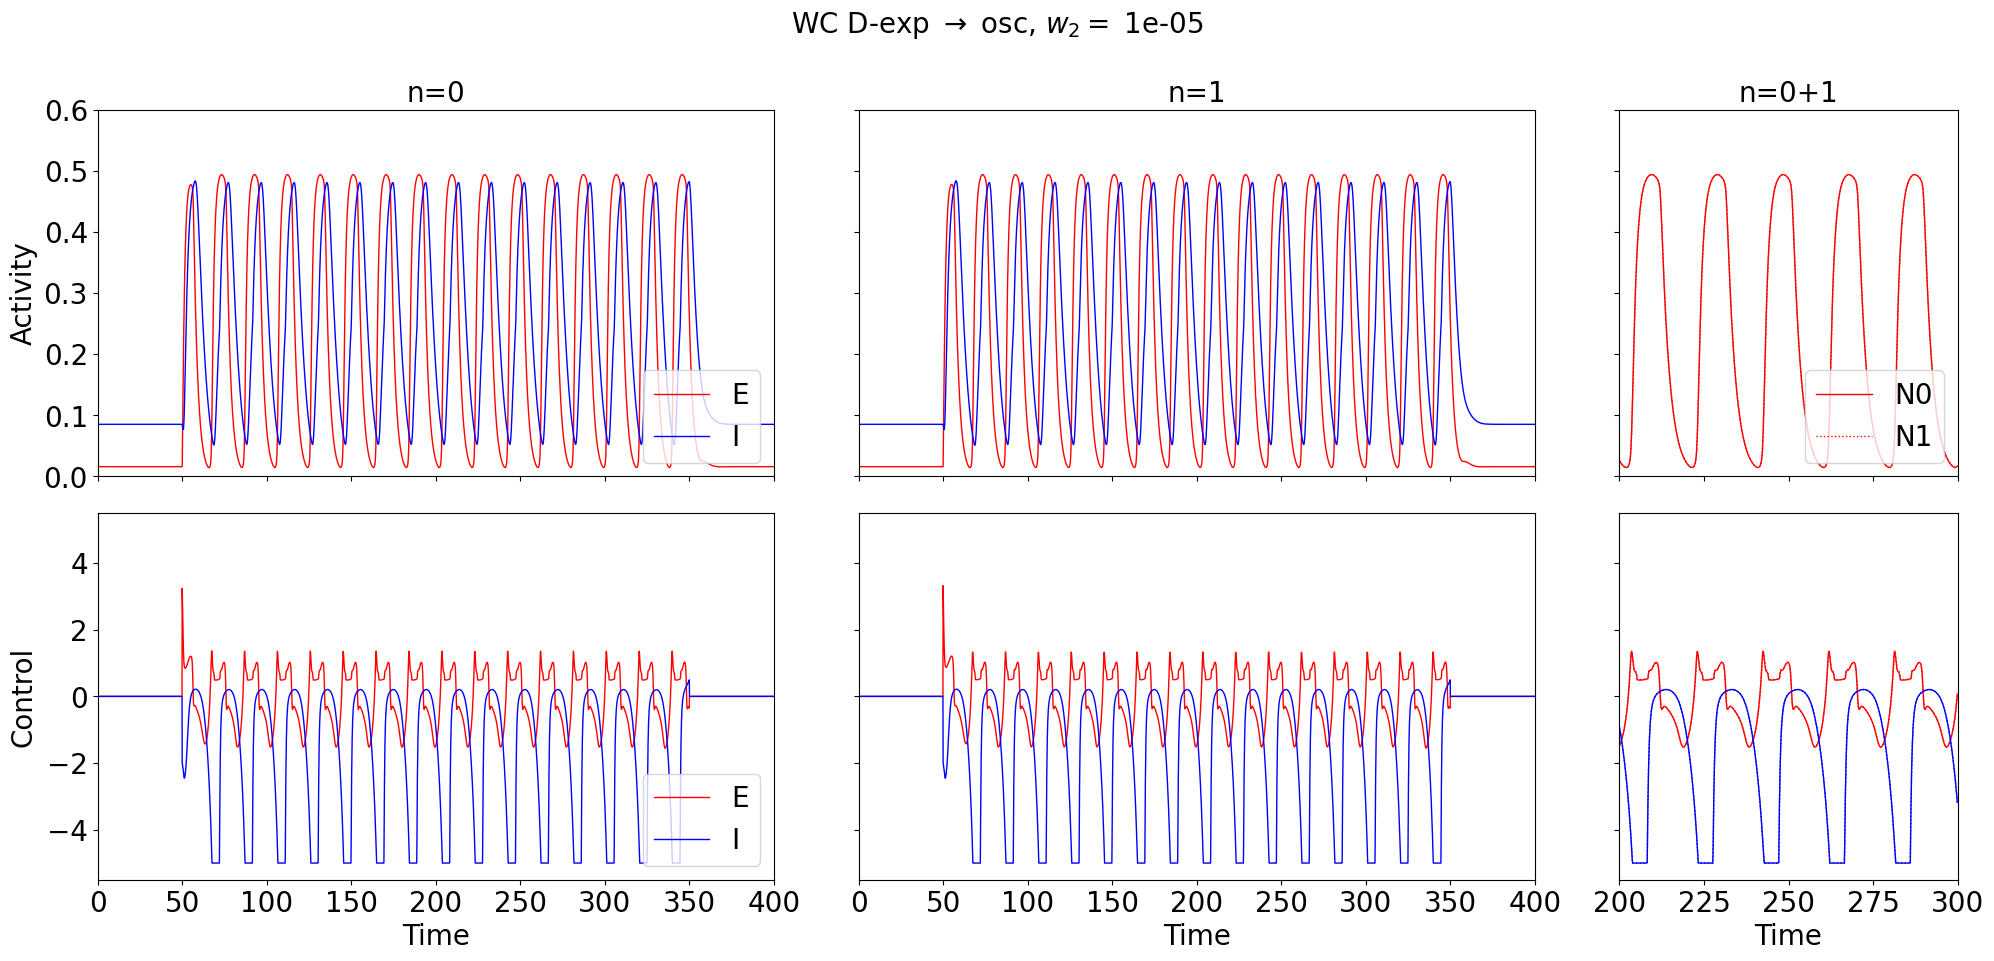

Point  D-osc
5e-05


TypeError: bad operand type for abs(): 'NoneType'

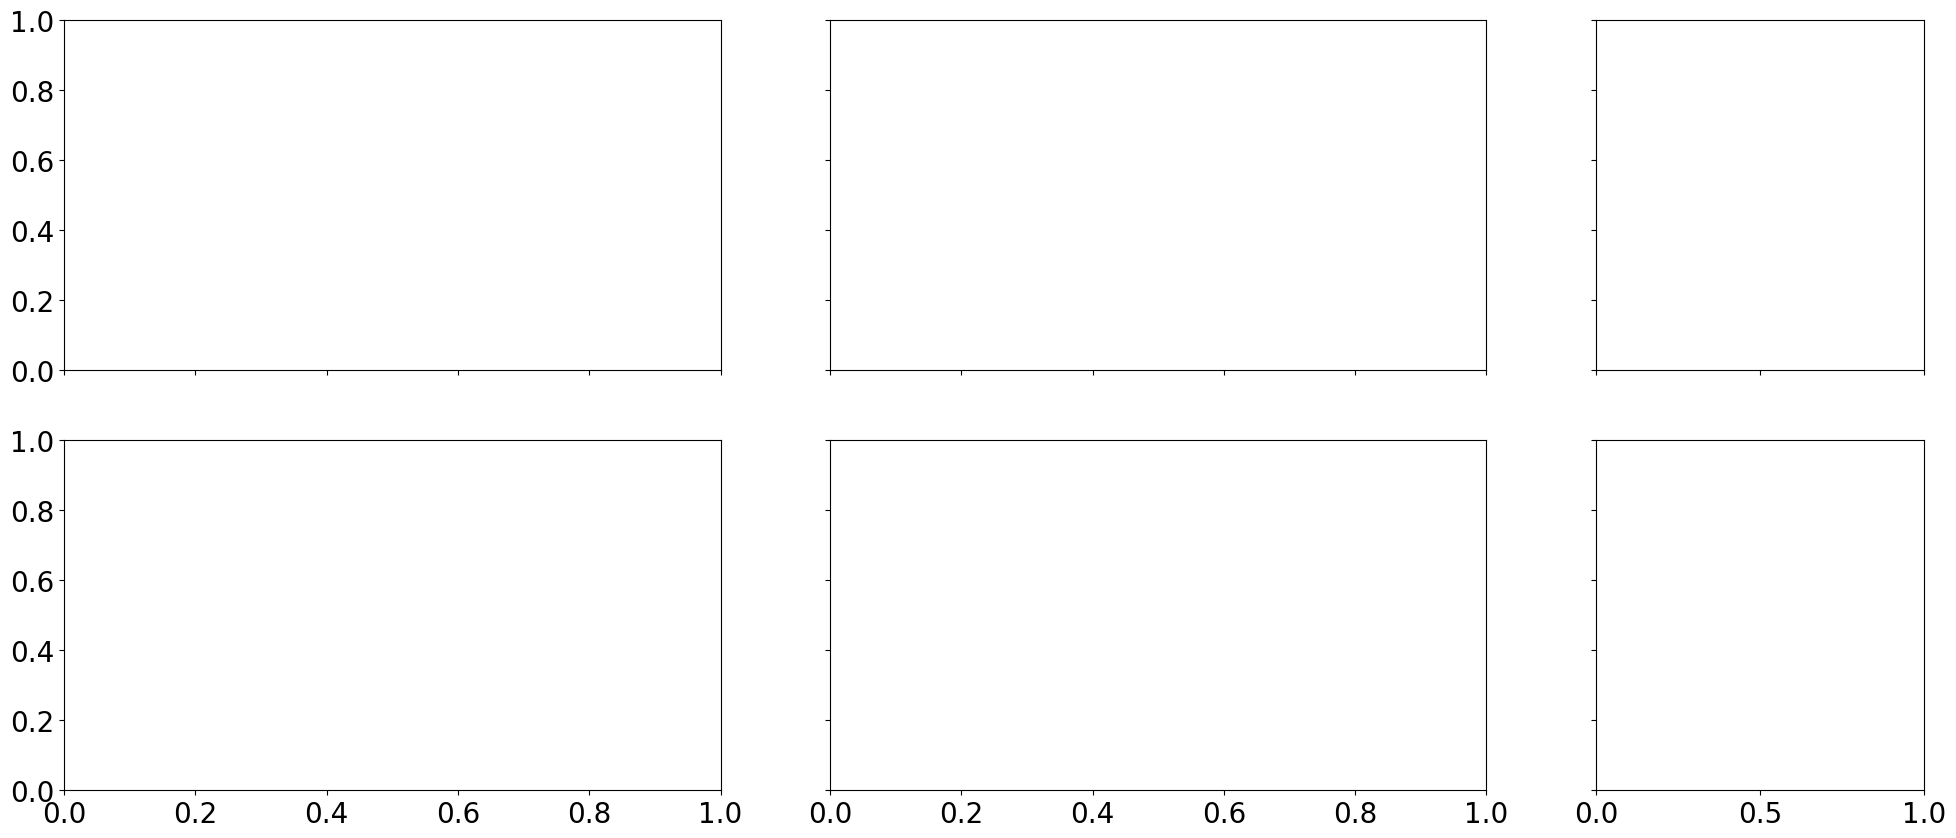

In [18]:
for pi in range(len(p_names)):
    p = p_names[pi]

    if "Bi" in p:
        continue

    if pi not in [0,1,2,3]:
        continue

    print("Point ", p)   

    for wi in range(len(data[p]["weight"])):

        print(data[p]["weight"][wi])

        filename = os.path.join(dir, str(p) + "_" + str(wi) + ".png")
        title = "WC " + p + r" $\rightarrow$ osc, $w_2 = $ " + "{}".format(data[p]["weight"][wi])
        plot_control(data[p],  data[p]["dur/per"][0], dt, wi, filename=filename, title=title)

In [17]:
y0lim = [0, 0.6]

def plot_control(data, dur, dt, wi, filename=None, title=None):
    fig, ax = plt.subplots(2,3, figsize=(24,10), sharex="col", sharey="row", gridspec_kw={'width_ratios': [2, 2, 1]})
    time_array = np.arange(0, dur+dt, dt)

    cmax = max( np.amax(np.abs(data["control"][0])), np.amax(np.abs(data["control"][1])) )
    y1lim = [-cmax* 1.1, cmax* 1.1]

    for n in range(N):
        ax[0, n].plot(time_array, data["state"][wi][n,0,:], color="red", label="E")
        ax[0, n].plot(time_array, data["state"][wi][n,1,:], color="blue", label="I")
        ax[1, n].plot(time_array, data["control"][wi][n,0,:], color="red", label="E")
        ax[1, n].plot(time_array, data["control"][wi][n,1,:], color="blue", label="I")

    i0, i1 = int(0.5* dur/dt), int(0.5* dur/dt) + 1000
    time_array = np.arange(i0*dt, i1*dt, dt)
    ax[0, 2].plot(time_array, data["state"][wi][0,0,i0:i1], color="red", label="N0")
    ax[0, 2].plot(time_array, data["state"][wi][1,0,i0:i1], color="red", linestyle=":", label="N1")
    ax[1, 2].plot(time_array, data["control"][wi][0,0,i0:i1], color="red")
    ax[1, 2].plot(time_array, data["control"][wi][1,0,i0:i1], color="red", linestyle=":")
    ax[1, 2].plot(time_array, data["control"][wi][0,1,i0:i1], color="blue")
    ax[1, 2].plot(time_array, data["control"][wi][1,1,i0:i1], color="blue", linestyle=":")

    ax[0,0].legend(loc="lower right")
    ax[1,0].legend(loc="lower right")
    ax[0,2].legend(loc="lower right")

    ax[0,0].set_xlim(0, dur)
    ax[0,1].set_xlim(0, dur)
    ax[0,2].set_xlim(i0*dt, i1*dt)

    ax[0,0].set_ylim(y0lim)
    ax[1,0].set_ylim(y1lim)

    ax[1,0].set_xlabel("Time")
    ax[1,1].set_xlabel("Time")
    ax[1,2].set_xlabel("Time")
    ax[0,0].set_ylabel("Activity")
    ax[1,0].set_ylabel("Control")

    ax[0,0].set_title("n=0")
    ax[0,1].set_title("n=1")
    ax[0,2].set_title("n=0+1")

    plt.subplots_adjust(
                    wspace=0.15,
                    hspace=0.1)
    
    fig.align_ylabels([ax[:,0]])
    
    if title is not None:
        fig.suptitle(title)

    if filename is not None:
        plt.savefig(filename, bbox_inches='tight', dpi=200)

    plt.show()
    return


def plot_control_bi(data, dur, dt, wi, iinit, filename=None, title=None):
    fig, ax = plt.subplots(2,3, figsize=(24,10), sharex="col", sharey="row", gridspec_kw={'width_ratios': [2, 2, 1]})
    time_array = np.arange(0, dur+dt, dt)

    cmax = max( np.amax(np.abs(data["control"][iinit][0])), np.amax(np.abs(data["control"][iinit][1])) )
    y1lim = [-cmax* 1.1, cmax* 1.1]

    for n in range(N):
        ax[0, n].plot(time_array, data["state"][iinit][wi][n,0,:], color="red", label="E")
        ax[0, n].plot(time_array, data["state"][iinit][wi][n,1,:], color="blue", label="I")
        ax[1, n].plot(time_array, data["control"][iinit][wi][n,0,:], color="red", label="E")
        ax[1, n].plot(time_array, data["control"][iinit][wi][n,1,:], color="blue", label="I")

    i0, i1 = 3000, 3800
    time_array = np.arange(i0*dt, i1*dt, dt)
    ax[0, 2].plot(time_array, data["state"][iinit][wi][0,0,i0:i1], color="red", label="N0")
    ax[0, 2].plot(time_array, data["state"][iinit][wi][1,0,i0:i1], color="red", linestyle=":", label="N1")
    ax[1, 2].plot(time_array, data["control"][iinit][wi][0,0,i0:i1], color="red")
    ax[1, 2].plot(time_array, data["control"][iinit][wi][1,0,i0:i1], color="red", linestyle=":")
    ax[1, 2].plot(time_array, data["control"][iinit][wi][0,1,i0:i1], color="blue")
    ax[1, 2].plot(time_array, data["control"][iinit][wi][1,1,i0:i1], color="blue", linestyle=":")

    ax[0,0].legend(loc="lower right")
    ax[1,0].legend(loc="lower right")
    ax[0,2].legend(loc="lower right")

    ax[0,0].set_xlim(0, dur)
    ax[0,1].set_xlim(0, dur)
    ax[0,2].set_xlim(i0*dt, i1*dt)

    ax[0,0].set_ylim(y0lim)
    ax[1,0].set_ylim(y1lim)

    ax[1,0].set_xlabel("Time")
    ax[1,1].set_xlabel("Time")
    ax[1,2].set_xlabel("Time")
    ax[0,0].set_ylabel("Activity")
    ax[1,0].set_ylabel("Control")

    ax[0,0].set_title("n=0")
    ax[0,1].set_title("n=1")
    ax[0,2].set_title("n=0+1")

    plt.subplots_adjust(
                    wspace=0.15,
                    hspace=0.1)
    
    fig.align_ylabels([ax[:,0]])
    
    if title is not None:
        fig.suptitle(title)

    if filename is not None:
        plt.savefig(filename, bbox_inches='tight', dpi=200)

    plt.show()
    return

In [ ]:
with open(os.path.join(pickledir, '2n_wc_static.pickle'), 'wb') as f:
    pickle.dump(data, f)

In [3]:
with open(os.path.join(pickledir, '2n_wc_static.pickle'), 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

data = res_read.copy()

dict_keys(['D-exp', 'D-osc', 'U-exp', 'U-osc', 'Bi-exp', 'Bi-osc'])


In [15]:
data["Bi-exp"]["weight"] = [[5. * 1e-5, 5. * 1e-4], [5. * 1e-5, 5. * 1e-4]]
data["Bi-osc"]["weight"] = [[5. * 1e-5, 5. * 1e-4], [1. * 1e-5, 1. * 1e-4]]

data["Bi-exp"]["dur/per"] = [[800., 30], [800., 30]]
data["Bi-osc"]["dur/per"] = [[500., 30], [1350., 100]]

Point  Bi-osc
target period, max delay =  10.750000000000002 95
duration =  1350.0
w2 =  1e-05
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -5.900418624878419e-18


Converged in iteration 18 with cost -3.6100742355725865e-10
Final cost : -3.6100742355725865e-10
Compute control for a deterministic system
Cost in iteration 0: -3.6100742355725865e-10
Converged in iteration 2 with cost -3.398053568514142e-09
Final cost : -3.398053568514142e-09
Compute control for a deterministic system
Cost in iteration 0: -3.398053568514142e-09
Converged in iteration 2 with cost -3.4086417219850064e-08
Final cost : -3.4086417219850064e-08
Compute control for a deterministic system
Cost in iteration 0: -3.4086417219850064e-08
Converged in iteration 2 with cost -3.411116503985556e-07
Final cost : -3.411116503985556e-07
Compute control for a deterministic system
Cost in iteration 0: -3.411116503985556e-07
Converged in iteration 2 with cost -3.4095884483413017e-06
Final cost : -3.4095884483413017e-06
Compute control for a deterministic system
Cost in iteration 0: -3.4095884483413017e-06
Converged in iteration 2 with cost -3.4077168473517166e-05
Final cost : -3.4077168473

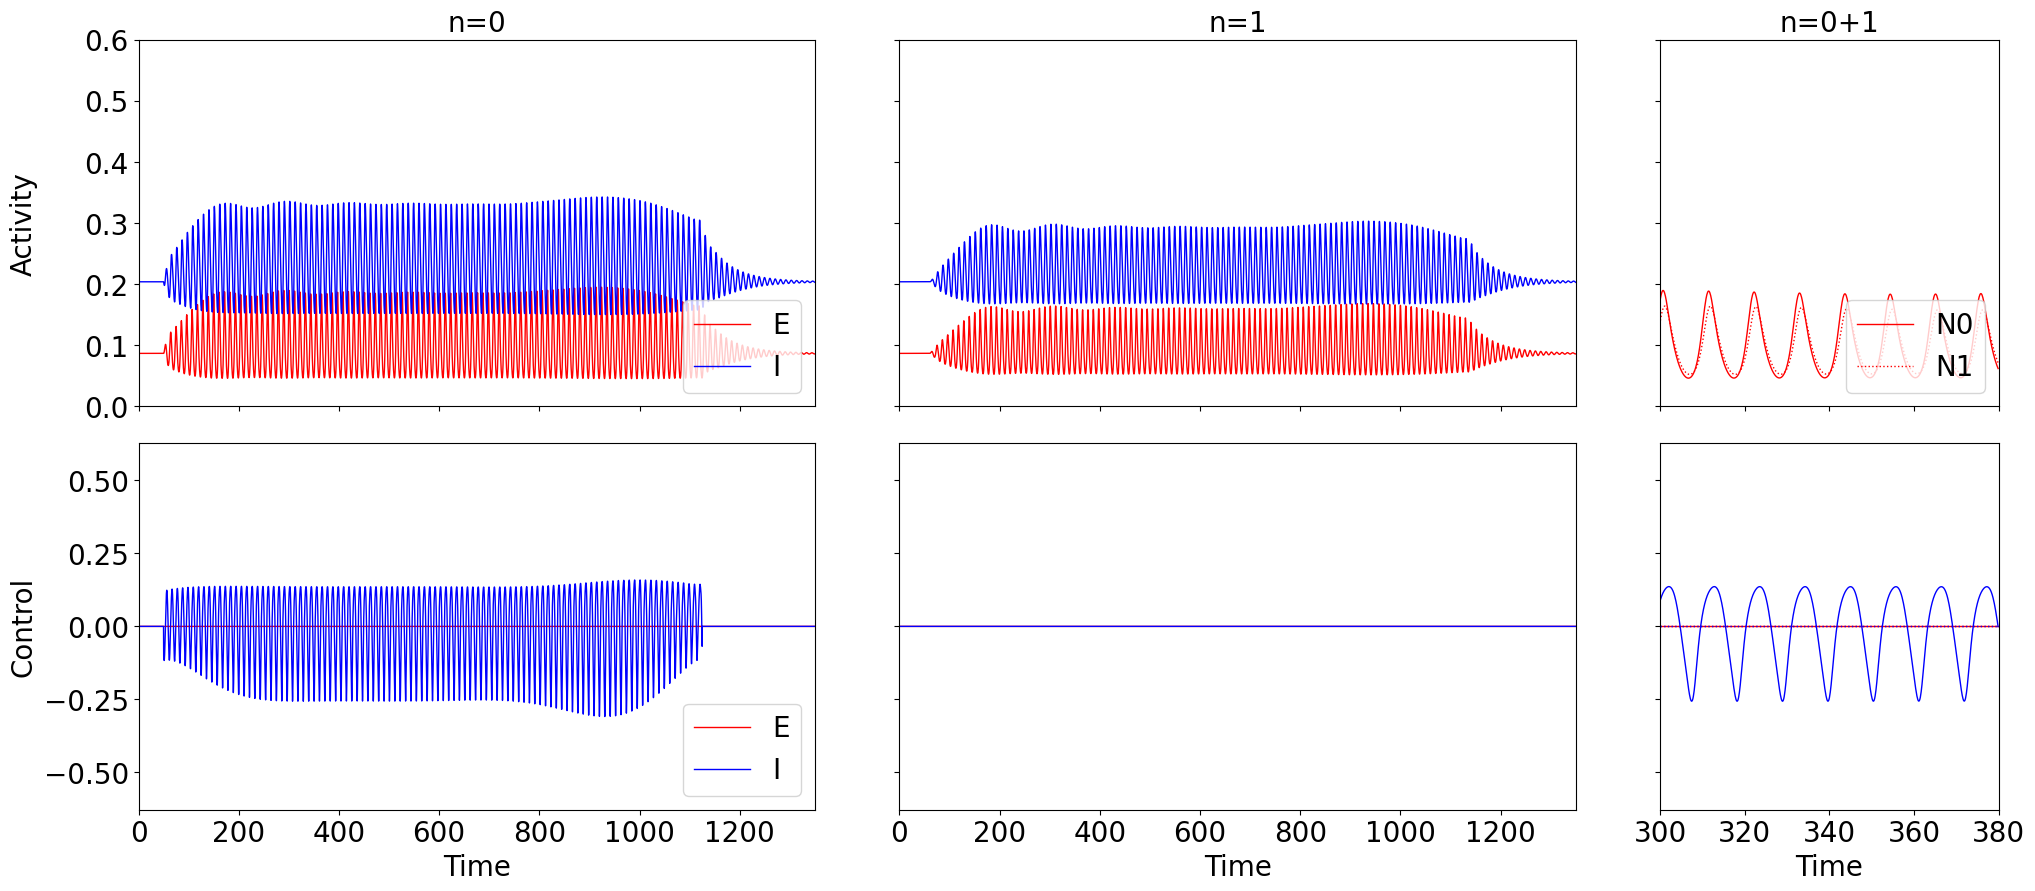

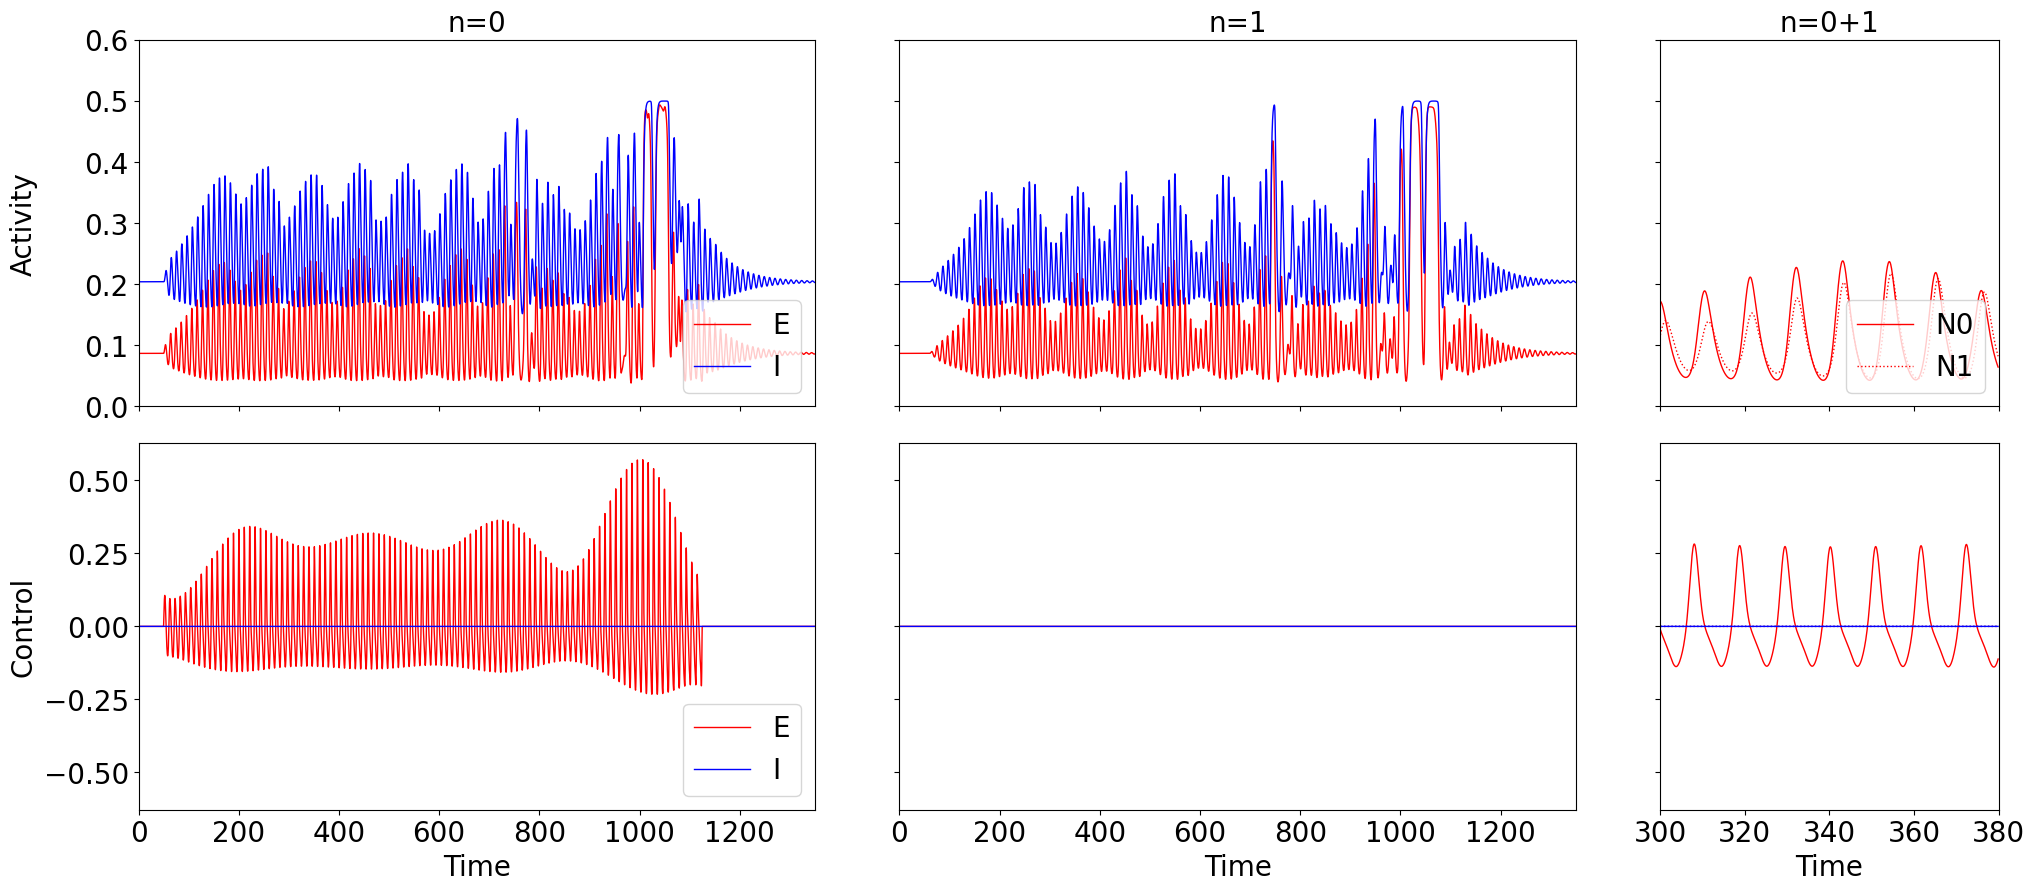

In [16]:
for pi in range(len(p_names)):
    p = p_names[pi]

    if "Bi" not in p:
        continue

    if pi not in [5]: continue

    print("Point ", p)

    target_period = data[p]["target_period"]

    model = WCModel(Cmat=cmat, Dmat=data[p_names[pi]]["delay"]*20.*cmat)
    nmaxdelay = model.getMaxDelay()
    print("target period, max delay = ", target_period, nmaxdelay)

    model.params["exc_ext_baseline"] =  data[p]["coordinates"][0]
    model.params["inh_ext_baseline"] =  data[p]["coordinates"][1]
    model.params.K_gl = coupling

    for i_init in range(2):

        if i_init not in [1]: continue
        
        model.params.duration = data[p]["dur/per"][i_init][0]
        print("duration = ", model.params.duration)

        zero_input0 = ZeroInput().generate_input(duration=model.params.duration+model.params.dt, dt=model.params.dt)
        zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
        zero_control = np.vstack( ([zero_input]*N))
        zero_control = np.vstack( ([zero_input]*N))
        model.params["exc_ext"] = zero_control[:,0,:]
        model.params["inh_ext"] = zero_control[:,1,:]

        model.params["exc_init"] = data[p]["init_state"][i_init][0]
        model.params["inh_init"] = data[p]["init_state"][i_init][1]

        model.run()
        
        int0 = 500
        int1 = int0 + int(data[p]["dur/per"][i_init][1]*target_period/dt)

        for wi, w2 in enumerate(data[p]["weight"][i_init]):

            print("w2 = ",w2)

            model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), control_interval=(int0, int1), cost_matrix=costmat, control_matrix=controlmat)
            model_controlled.channelwise_optimization = True
            model_controlled.weights["w_p"] = 0.
            model_controlled.weights["w_2"] = w2
            model_controlled.weights["w_f_sync"] = 1.

            model_controlled.maximum_control_strength = maxstr

            if False:
                if type(data[p]["control"][i_init]) != type(None):
                    model_controlled.control = data[p]["control"][i_init].copy()
                    model_controlled.update_input()            

            if True:
                initrange = np.arange(-6., 7., 1.)
                cost_0e, cost_0i, cost_1e, cost_1i, cost_e, cost_i, cost_ei = 1e6, 1e6, 1e6, 1e6, 1e6, 1e6, 1e6
                
                ######## init 0E
                model_controlled.control_matrix = controlmat_0e
                model_controlled.control = zero_control.copy()
                model_controlled.update_input()
                optimize_model(model_controlled, initrange)

                cost_0e = model_controlled.cost_history[-1]
                control_0e = model_controlled.control.copy()

                ######## init 0I
                model_controlled.control_matrix = controlmat_0i
                model_controlled.control = zero_control.copy()
                model_controlled.update_input()
                optimize_model(model_controlled, initrange)

                cost_0i = model_controlled.cost_history[-1]
                control_0i = model_controlled.control.copy()

                ######## init 1E
                model_controlled.control_matrix = controlmat_1e
                model_controlled.control = zero_control.copy()
                model_controlled.update_input()
                optimize_model(model_controlled, initrange)

                cost_1e = model_controlled.cost_history[-1]
                control_1e = model_controlled.control.copy()

                ######## init 1I
                model_controlled.control_matrix = controlmat_1i
                model_controlled.control = zero_control.copy()
                model_controlled.update_input()
                optimize_model(model_controlled, initrange)

                cost_1i = model_controlled.cost_history[-1]
                control_1i = model_controlled.control.copy()

                ######## init E
                model_controlled.control_matrix = controlmat_e
                model_controlled.control = zero_control.copy()
                model_controlled.update_input()
                optimize_model(model_controlled, initrange)

                cost_e = model_controlled.cost_history[-1]
                control_e = model_controlled.control.copy()

                ######## init I
                model_controlled.control_matrix = controlmat_i
                model_controlled.control = zero_control.copy()
                model_controlled.update_input()
                optimize_model(model_controlled, initrange)

                cost_i = model_controlled.cost_history[-1]
                control_i = model_controlled.control.copy()

                ######## init E/I
                model_controlled.control_matrix = controlmat
                model_controlled.control = zero_control.copy()
                model_controlled.update_input()
                optimize_model(model_controlled, initrange)

                cost_ei = model_controlled.cost_history[-1]
                control_ei = model_controlled.control.copy()

                ###### compare
                all_cost = [cost_0e, cost_0i, cost_1e, cost_1i, cost_e, cost_i, cost_ei]
                print(all_cost)
                if min(all_cost) == cost_0e:
                    model_controlled.control = control_0e.copy()
                    print("CHOSE 0E INIT --------------------------------------------------------")
                elif min(all_cost) == cost_0i:
                    model_controlled.control = control_0i.copy()
                    print("CHOSE 0I INIT --------------------------------------------------------")
                elif min(all_cost) == cost_1e:
                    model_controlled.control = control_1e.copy()
                    print("CHOSE 1E INIT --------------------------------------------------------")
                elif min(all_cost) == cost_1i:
                    model_controlled.control = control_1i.copy()
                    print("CHOSE 1I INIT --------------------------------------------------------")
                elif min(all_cost) == cost_e:
                    model_controlled.control = control_e.copy()
                    print("CHOSE E INIT --------------------------------------------------------")
                elif min(all_cost) == cost_i:
                    model_controlled.control = control_i.copy()
                    print("CHOSE I INIT --------------------------------------------------------")
                elif min(all_cost) == cost_ei:
                    model_controlled.control = control_ei.copy()
                    print("CHOSE EI INIT --------------------------------------------------------")

                model_controlled.update_input()

            for l in range(2):
                for k in np.arange(-6., 7., 1.):
                    model_controlled.zero_step_encountered = False
                    model_controlled.step = 10**(k)
                    model_controlled.optimize(it)

            data[p]["control"][i_init][wi] = model_controlled.control.copy()
            data[p]["state"][i_init][wi] = model_controlled.get_xs()

        plot_control_bi(data[p], data[p]["dur/per"][i_init][0], dt, 0, i_init)
        plot_control_bi(data[p], data[p]["dur/per"][i_init][0], dt, 1, i_init)

with open(os.path.join(pickledir, '2n_wc_static.pickle'), 'wb') as f:
    pickle.dump(data, f)

Point  Bi-exp
0 5e-05


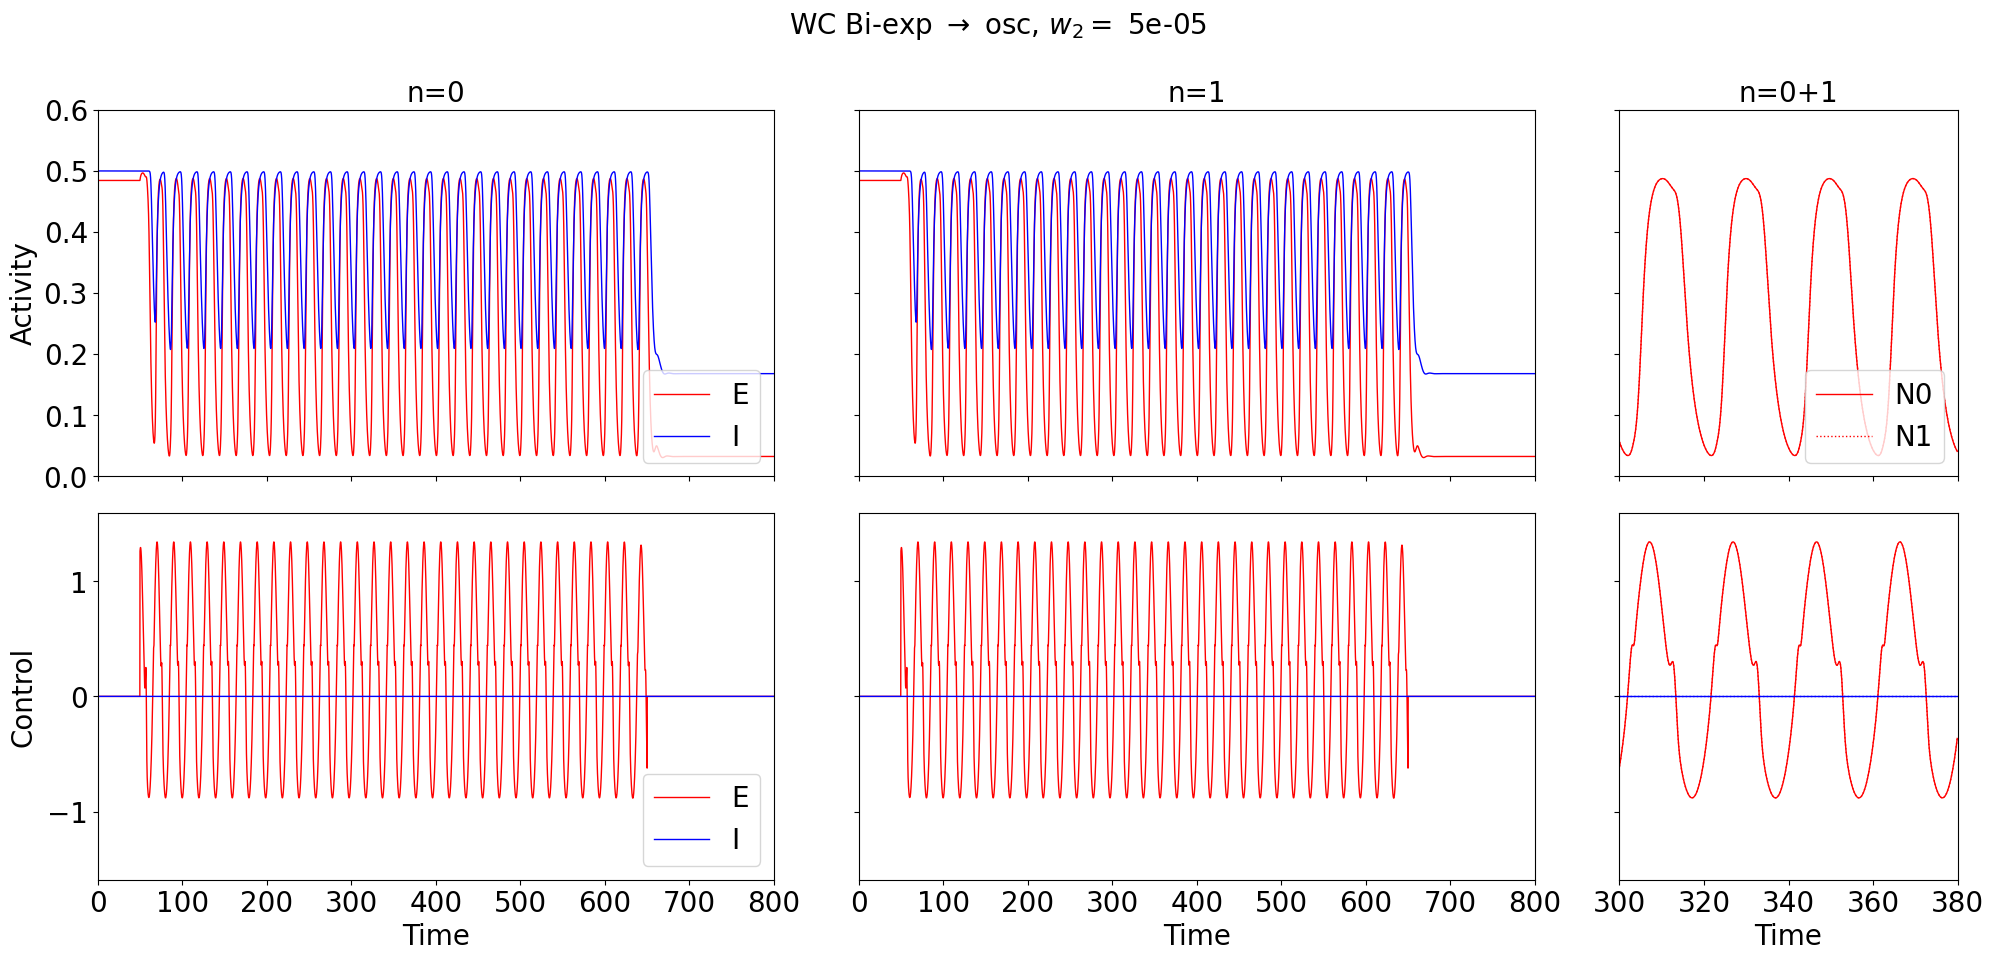

0 0.0005


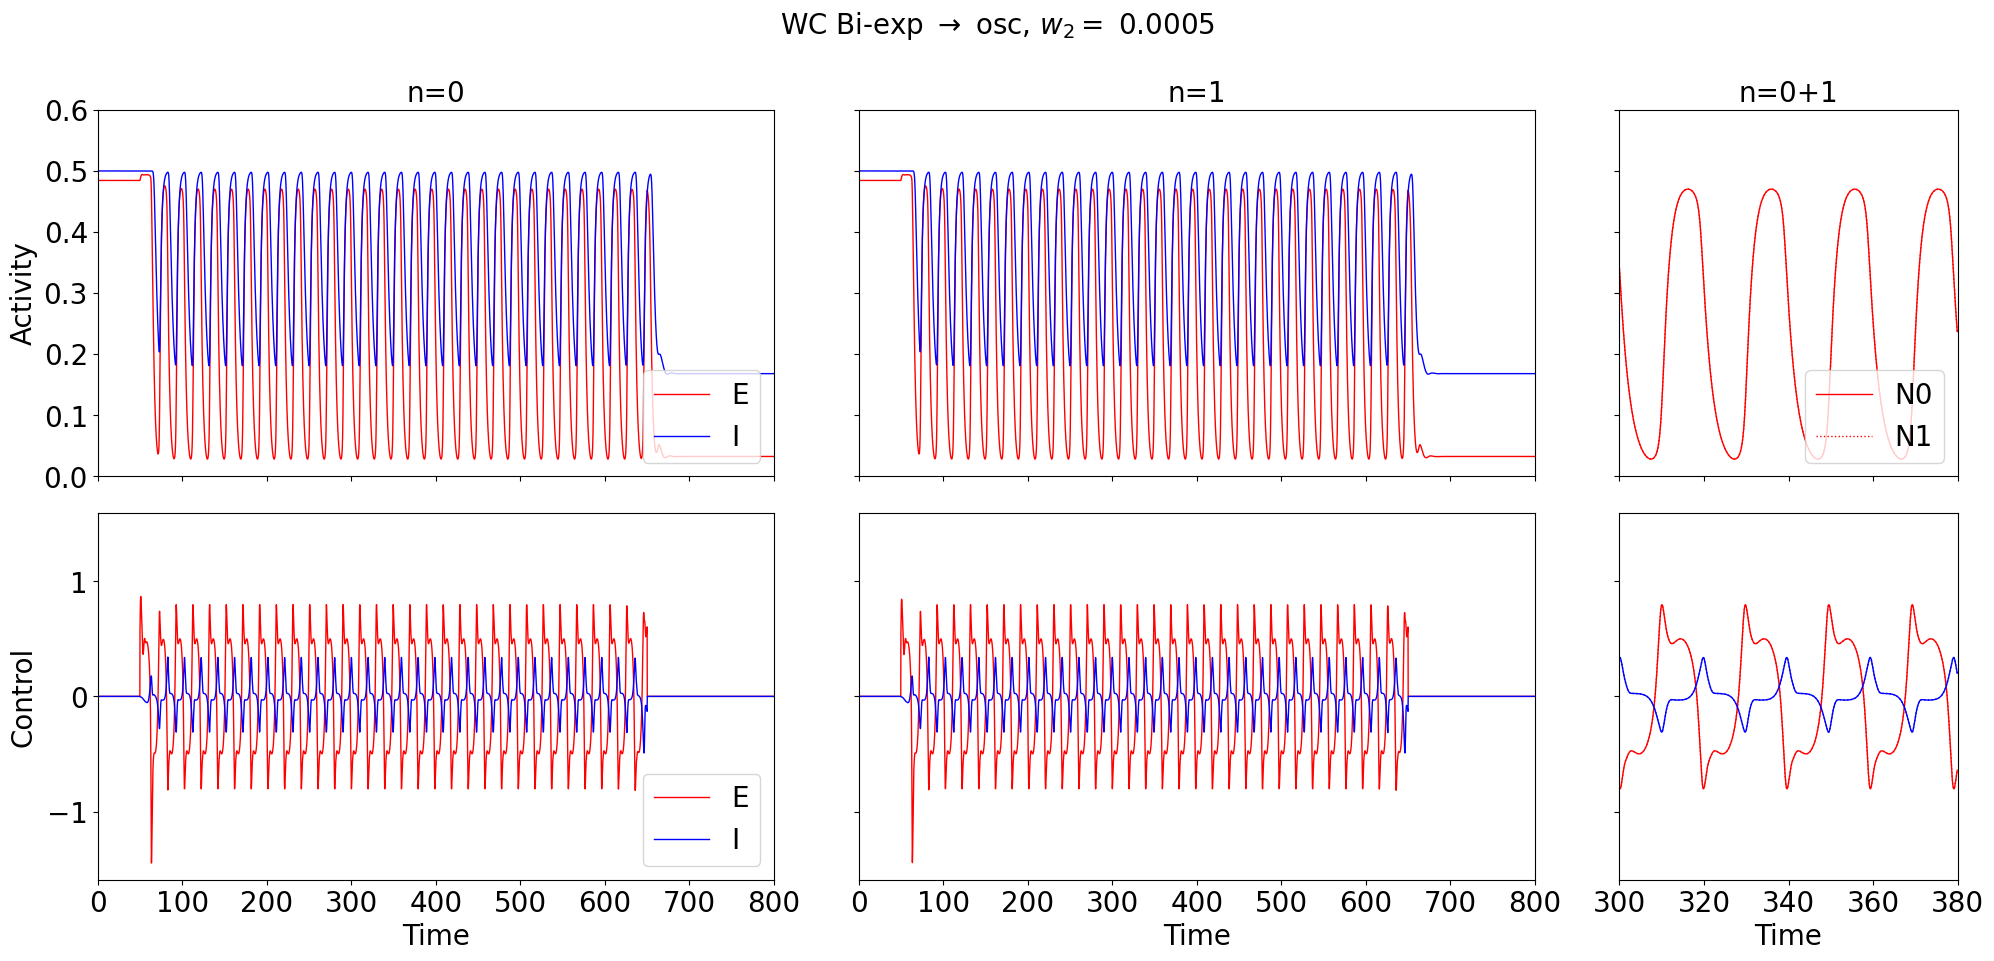

1 5e-05


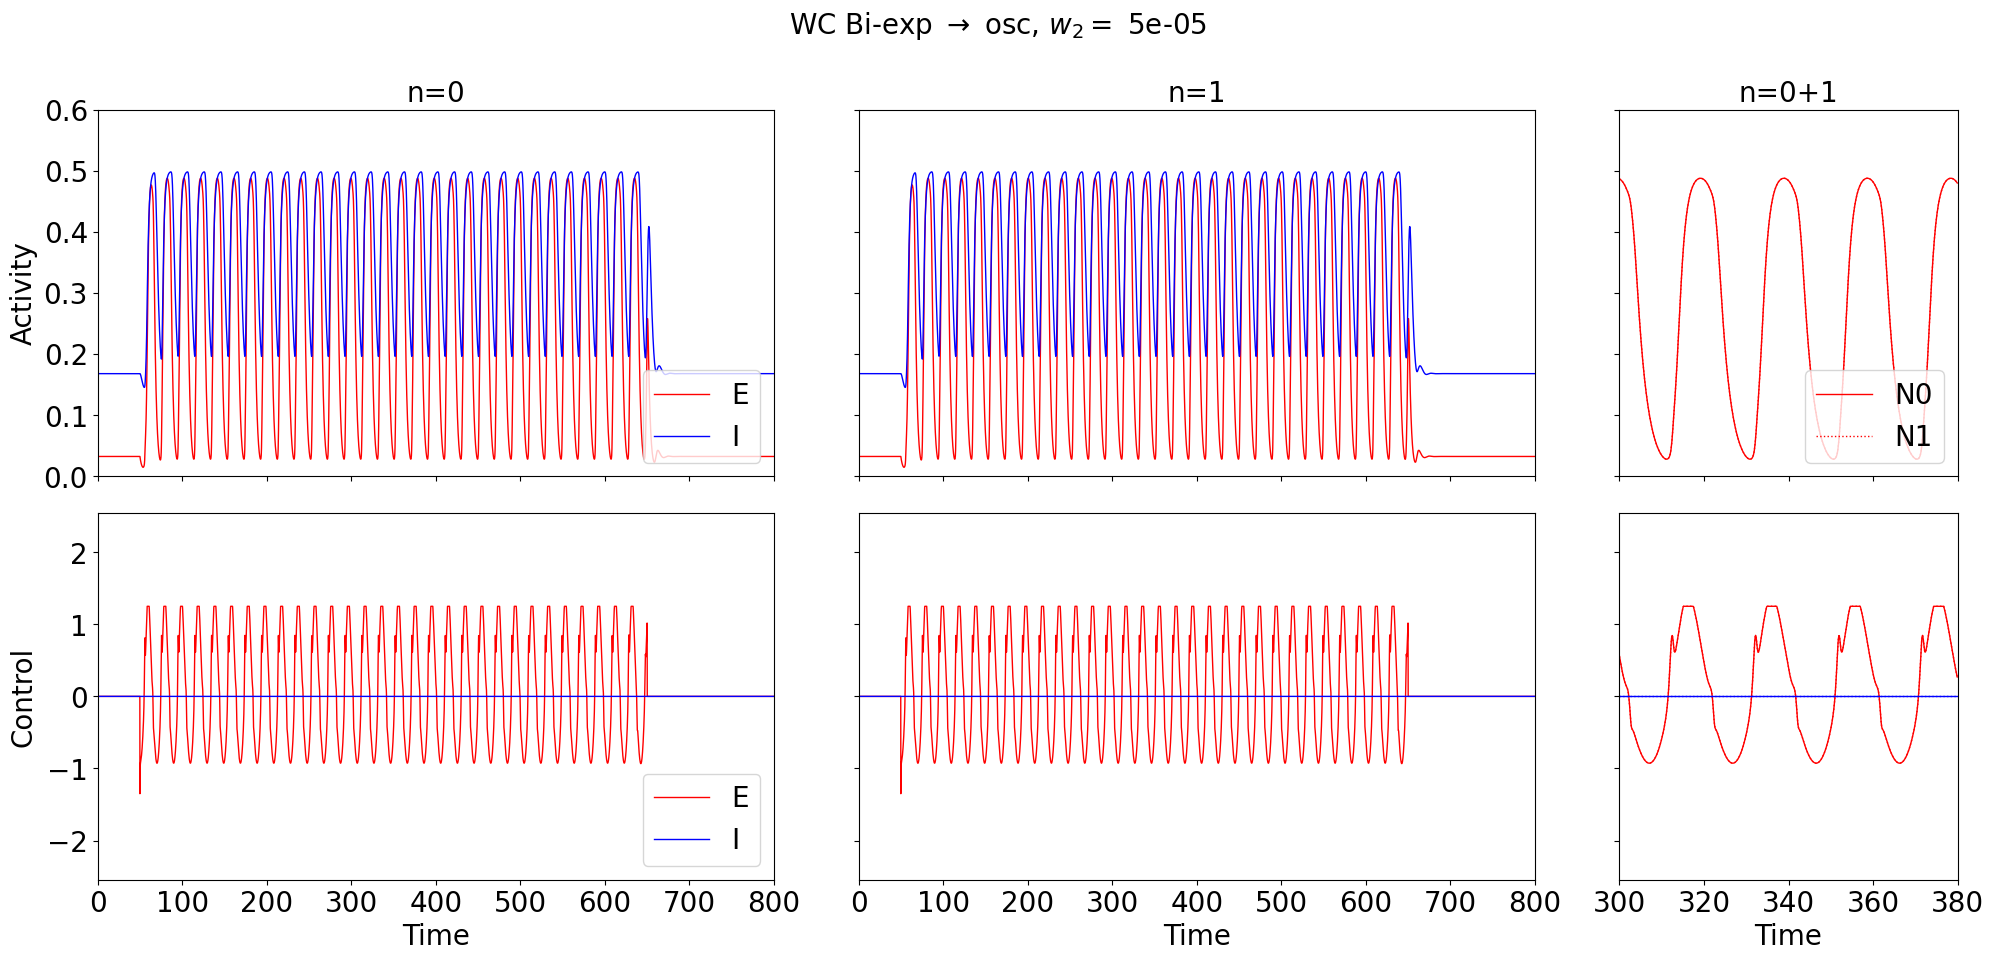

1 0.0005


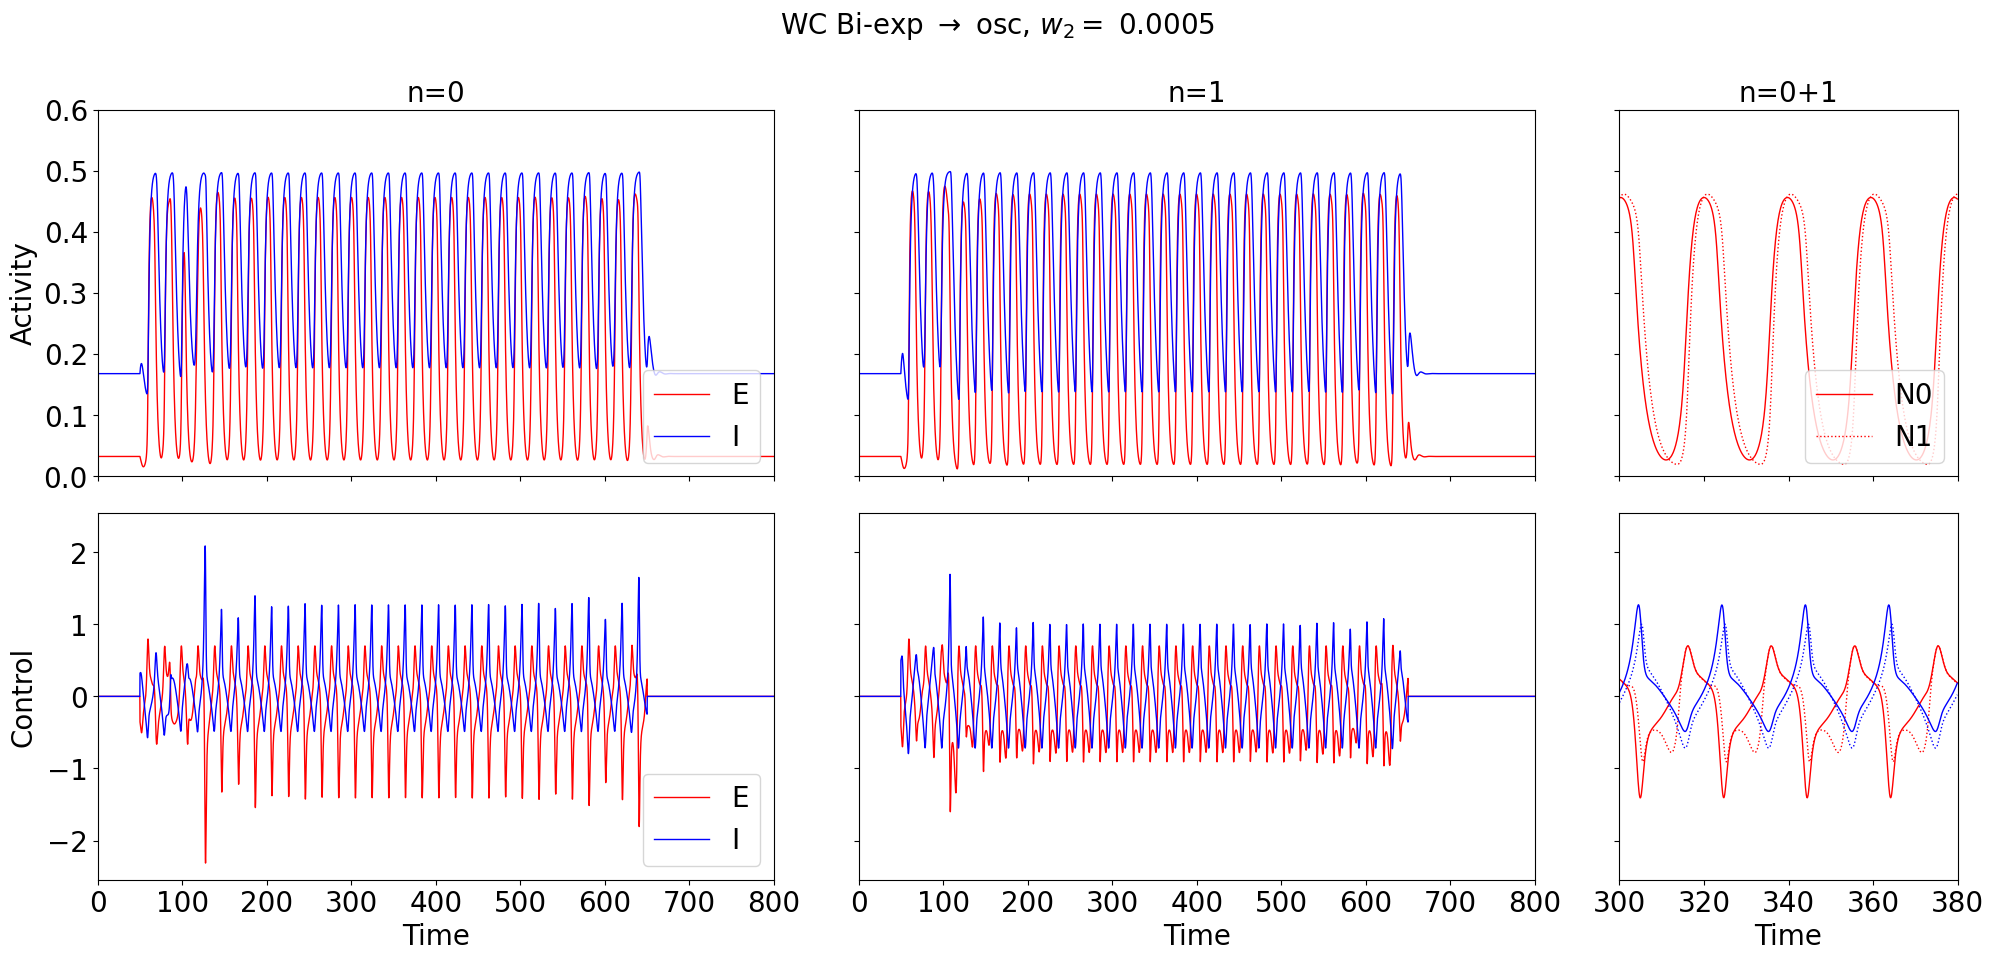

Point  Bi-osc
0 5e-05


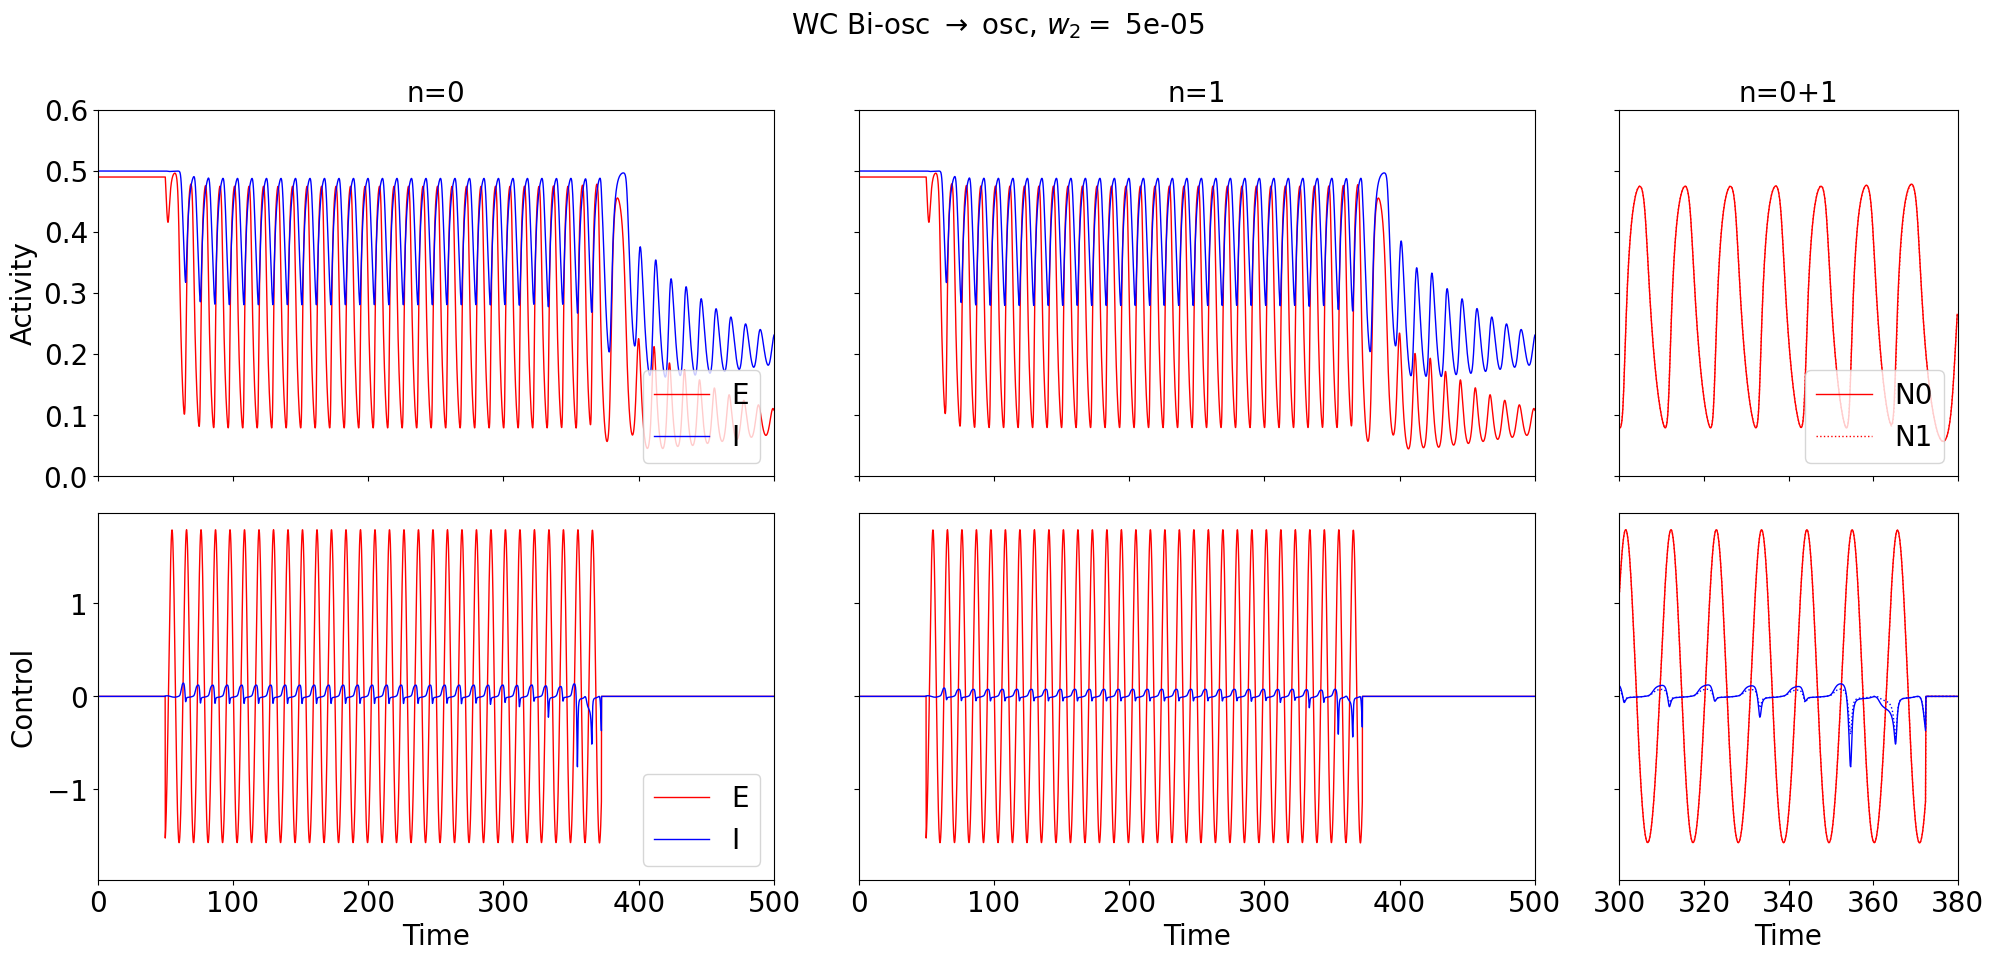

0 0.0005


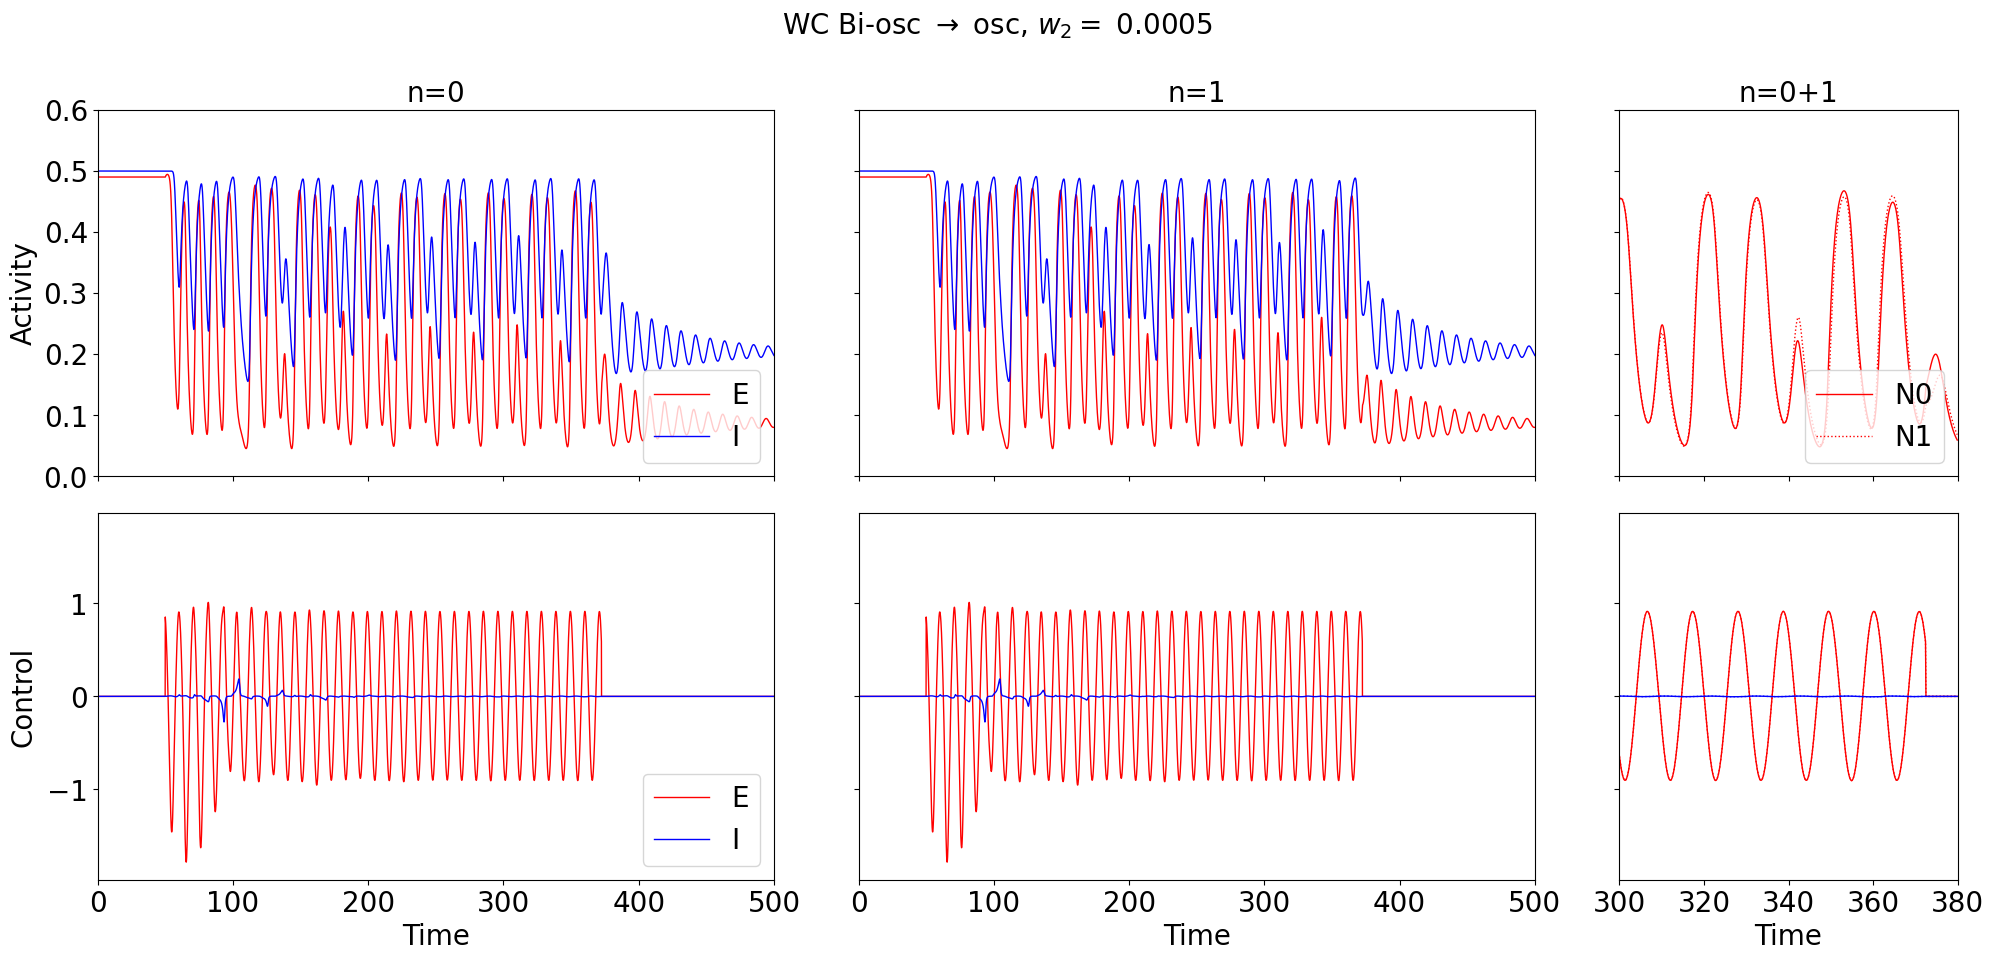

1 1e-05


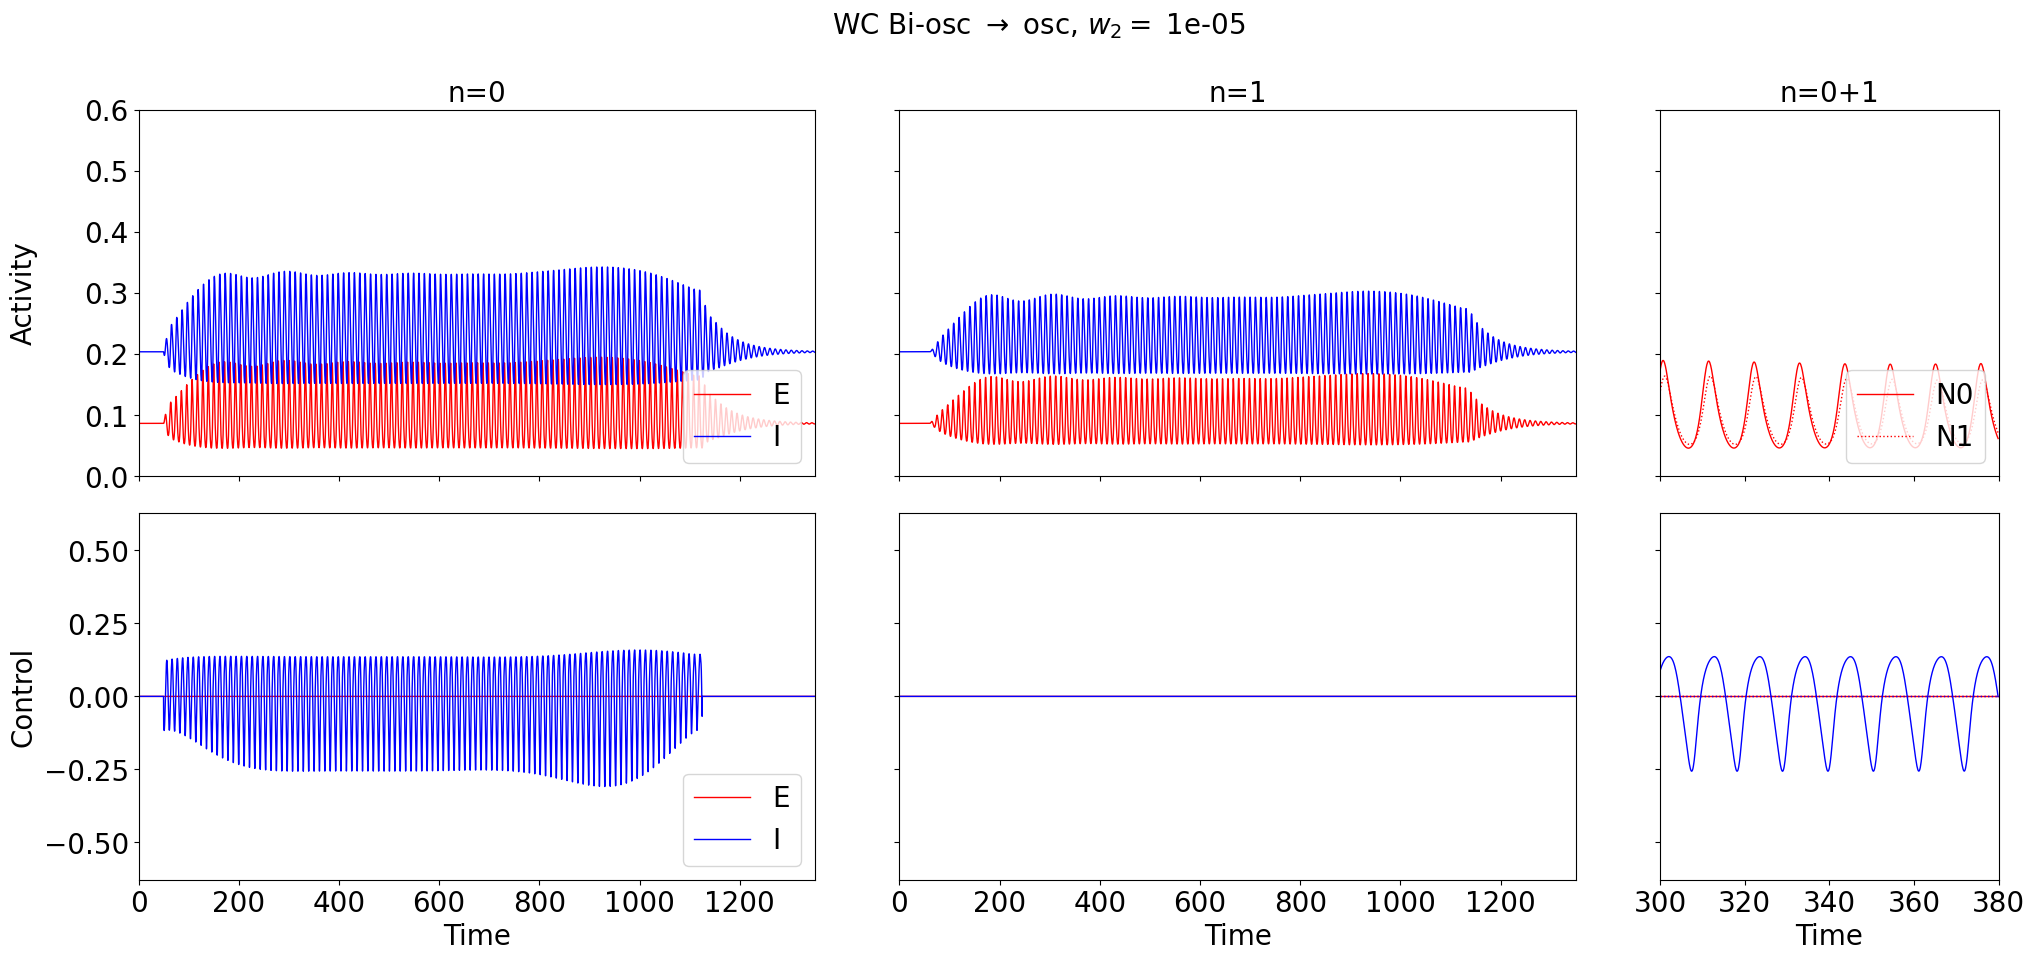

1 0.0001


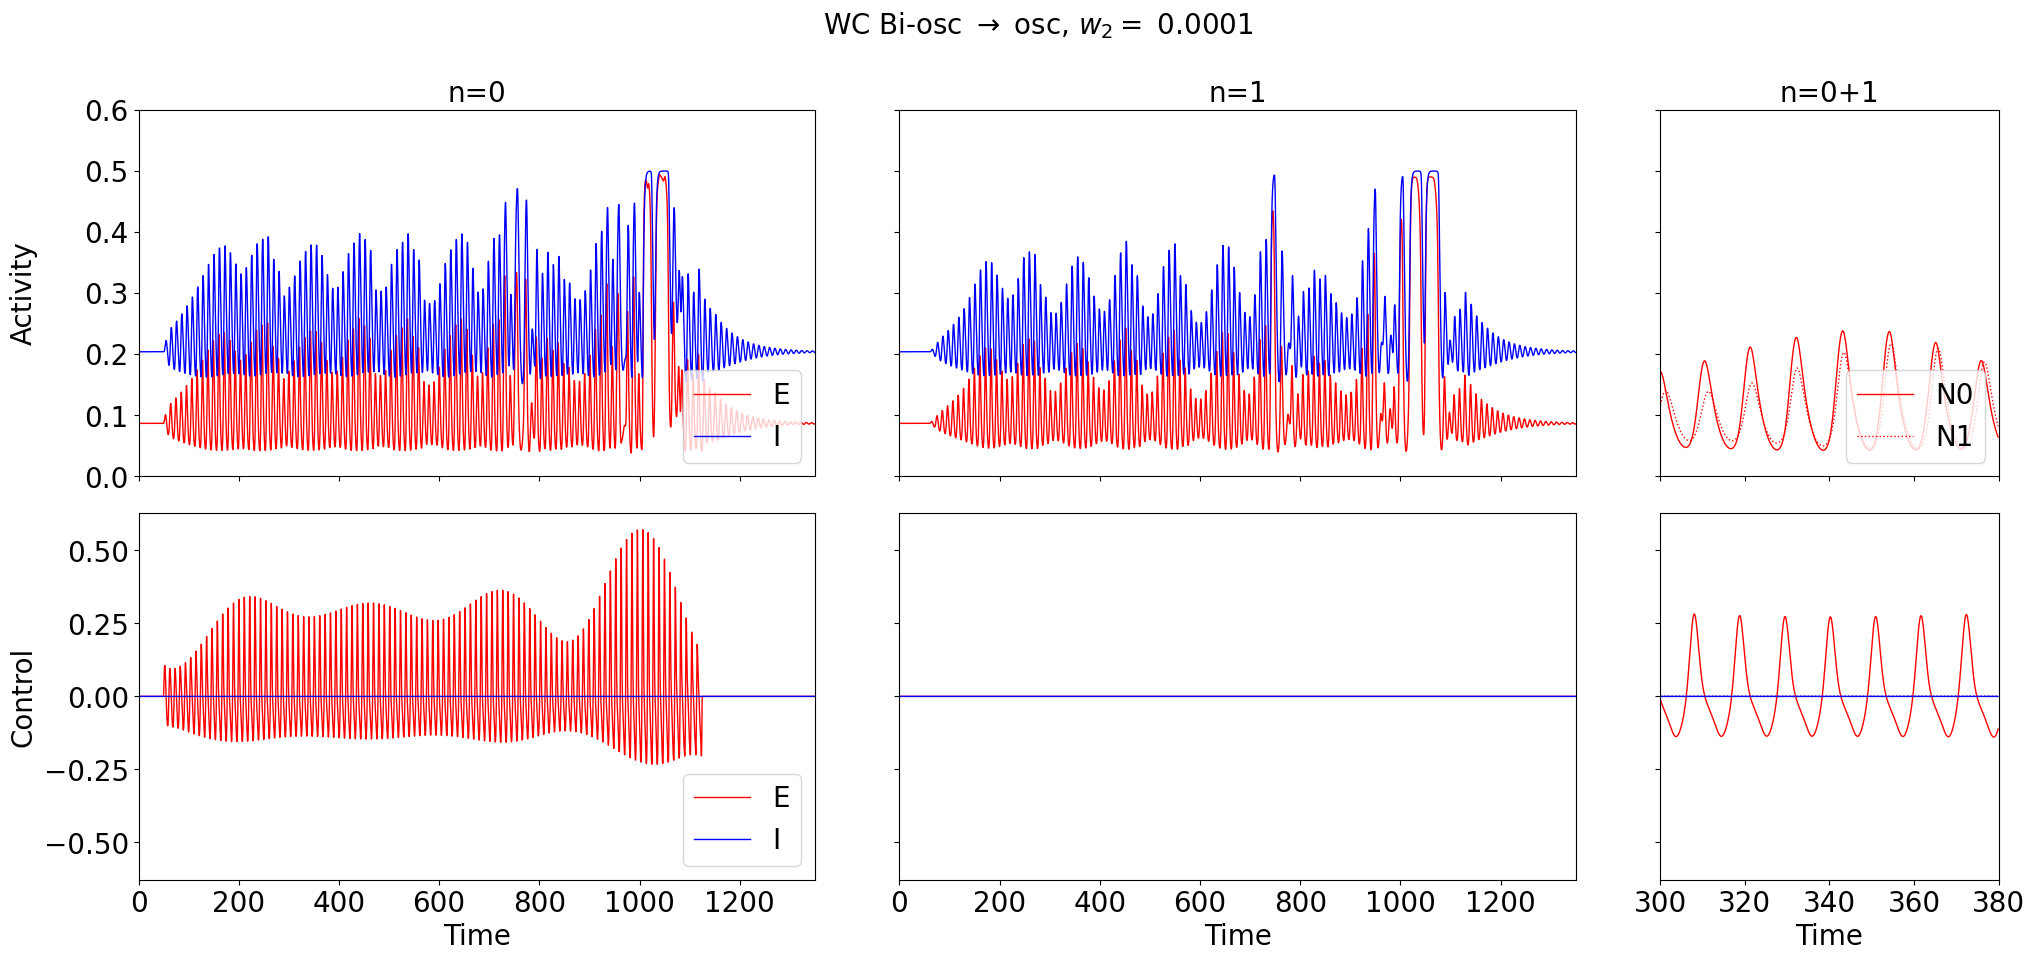

In [17]:
for pi in range(len(p_names)):
    p = p_names[pi]

    if "Bi" not in p:
        continue

    #if pi not in [5]: continue

    print("Point ", p)   

    for i_init in range(2):

        for wi in range(len(data[p]["weight"])):

            print(i_init, data[p]["weight"][i_init][wi])

            filename = os.path.join(dir, str(p) + "_" + str(i_init) + "_" + str(wi) + ".png")
            title = "WC " + p + r" $\rightarrow$ osc, $w_2 = $ " + "{}".format(data[p]["weight"][i_init][wi])
            plot_control_bi(data[p],  data[p]["dur/per"][i_init][0], dt, wi, i_init, filename=filename, title=title)